In [86]:
# Let's bring in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

## Intro

Imagine you are a data scientist who was recently hired for a company that has interest in expanding its business to NYC. The company caters to the high-end market and is looking to open up shops in the most profitable areas of the city. The company has hired you to help them find the best boroughs to open up their shops, and the only data you have is real estate sales from the past few years. How would you go about solving this problem?

-- Let's talk about how we can solve this using Fourier Transforms and K-Means Clustering.

Throughout this article, I will demostrate how one can approach this problem by applying Fourier Transforms and K-Means Clustering to a time-series. Ultimately, we will use these techniques to extract additive features from the time-series and find clusters . The clusters will then be used to identify the boroughs that have a postive trend in terms of real estate sales.


Introduction

Picture yourself as a data scientist who has recently joined a prestigious company with aspirations to expand its luxury business into the bustling metropolis of New York City. Tasked with identifying the most lucrative areas for the company to establish its presence, you have access to one primary dataset: real estate sales from the past several years. The challenge? Determining the best boroughs for new shops using this information.

In this article, we'll explore how to tackle this problem by employing Fourier Transforms and K-Means Clustering to analyze time-series data. By extracting additive features from the time-series and identifying distinct clusters, we can pinpoint the boroughs with an upward trend in real estate sales, making them prime candidates for your company's expansion. Join us as we delve into the power of these techniques and unveil the hidden potential of NYC's most promising neighborhoods.

## Understanding Fourier Transform

Fourier Transform, named after the French mathematician Jean-Baptiste Joseph Fourier, is a powerful mathematical tool that allows us to break down a complex signal into its individual frequency components. In essence, it transforms a time-domain signal, which is a representation of how a signal evolves over time, into its frequency-domain counterpart, revealing the different frequencies that make up the original signal.

Imagine a symphony orchestra playing a beautiful piece of music. While the audience perceives the music as a single harmonious melody, it is, in fact, a combination of multiple instruments, each producing sound at different frequencies. Fourier Transform is akin to having the ability to isolate each instrument's contribution to the overall performance, allowing us to understand and appreciate the individual components that create the masterpiece.

In the context of data analysis, Fourier Transform can be particularly useful for time-series data, as it helps to identify underlying patterns, periodicities, and trends that might not be apparent in the time-domain representation. By decomposing the time-series data into its frequency components, we can uncover hidden structures and relationships within the data, making it easier to analyze, manipulate, and interpret.

In summary, Fourier Transform is an essential technique that facilitates the transition from time-domain to frequency-domain analysis, providing valuable insights into the underlying characteristics of complex signals and time-series data. By harnessing the power of this mathematical tool, we can unveil the hidden patterns that govern our world and make more informed decisions based on a deeper understanding of the data.

## Continuous Time Fourier Transform (CTFT): CTFT is used to analyze continuous, non-periodic time-domain signals. The CTFT of a continuous function x(t) is represented by X(ω), where ω is the angular frequency. Mathematically, the CTFT is defined by the following integral:
X(ω) = ∫ x(t) * e^(-jωt) dt, from -∞ to ∞
Here, j is the imaginary unit (j^2 = -1), and the exponential term e^(-jωt) represents a complex sinusoid. The inverse CTFT, which helps to recover the original time-domain signal from its frequency-domain representation, is given by:
x(t) = (1 / 2π) ∫ X(ω) * e^(jωt) dω, from -∞ to ∞
Discrete Time Fourier Transform (DTFT): DTFT is used for discrete, non-periodic time-domain signals. For a discrete function x[n], its DTFT, X(e^(jω)), is defined as:
X(e^(jω)) = Σ x[n] * e^(-jωn), from n = -∞ to ∞
The inverse DTFT is given by:
x[n] = (1 / 2π) ∫ X(e^(jω)) * e^(jωn) dω, from -π to π
Fourier Series: Fourier Series is used for continuous, periodic time-domain signals. A continuous periodic function x(t) with period T can be represented as a sum of sinusoids (sines and cosines) as follows:
x(t) = a₀ + Σ [aₙ * cos(nω₀t) + bₙ * sin(nω₀t)], from n = 1 to ∞
Here, ω₀ = 2π / T is the fundamental angular frequency, and a₀, aₙ, and bₙ are the Fourier coefficients, calculated as:
a₀ = (1 / T) ∫ x(t) dt, over one period
aₙ = (2 / T) ∫ x(t) * cos(nω₀t) dt, over one period
bₙ = (2 / T) ∫ x(t) * sin(nω₀t) dt, over one period
Discrete Fourier Transform (DFT): DFT is used for discrete, periodic time-domain signals. Given a discrete function x[n] with N samples, its DFT, X[k], is defined as:
X[k] = Σ x[n] * e^(-j(2π/N)nk), from n = 0 to N-1
The inverse DFT is given by:
x[n] = (1 / N) Σ X[k] * e^(j(2π/N)nk), from k = 0 to N-1
In practice, the most commonly used transform is the Fast Fourier Transform (FFT), an efficient algorithm for computing the DFT. It significantly reduces the computational complexity, making it ideal for applications in digital signal processing, image processing, and data analysis.

These different types of Fourier Transforms allow us to analyze various kinds of signals and extract meaningful information from their frequency-domain representations. By choosing the appropriate transform for a given context, we can uncover the underlying patterns and structures that govern the data, enhancing our understanding and facilitating better decision-making.

### Fast Fourier Transform (FFT)

The Fast Fourier Transform (FFT) is an efficient algorithm used to compute the Discrete Fourier Transform (DFT) and its inverse. The primary advantage of FFT is its reduced computational complexity compared to the direct calculation of the DFT. While the DFT has a complexity of O(N^2) for N data points, the FFT reduces it to O(N*log(N)), making it much faster for large datasets.

The Cooley-Tukey algorithm is the most widely known FFT algorithm. It works by recursively breaking down the DFT computation into smaller DFTs of the input data, taking advantage of the periodicity and symmetry properties of the complex roots of unity. This divide-and-conquer approach significantly speeds up the calculation.

Now, let's discuss how we can apply the FFT to extract trends from the NYC real estate sales data.

Preprocessing: First, clean and preprocess the data. This may include handling missing values, aggregating the data at the desired level (e.g., weekly or monthly sales), and ensuring a consistent time interval between data points.
Detrending: Remove any linear or polynomial trends present in the time-series data. This can be done using linear regression or other detrending techniques. Detrending ensures that the Fourier analysis focuses on the underlying periodic components rather than the overall trend.
Applying FFT: Apply the FFT algorithm to the detrended time-series data. This will transform the data from the time domain to the frequency domain, revealing the different frequencies that make up the original signal.
Analyzing the frequency spectrum: Examine the resulting frequency spectrum to identify the dominant frequencies and their corresponding amplitudes. These frequencies represent the most significant periodic components in the data. Keep in mind that, for real-valued time-series data, the frequency spectrum will be symmetric. Thus, you only need to analyze the positive frequency components.
Filtering and reconstruction: If desired, you can filter out high-frequency noise by setting a frequency threshold and retaining only the dominant low-frequency components. Then, apply the inverse FFT to reconstruct the filtered time-series data in the time domain. This will provide a smoother representation of the data, highlighting the long-term trends and cycles.
Extracting trends: Finally, analyze the reconstructed time-series data to extract meaningful trends and patterns. This may involve comparing the trends across different boroughs, looking for consistent growth or decline in real estate sales, and identifying areas that exhibit the most promising performance.
By applying the FFT to the NYC real estate sales data, you can effectively extract trends and periodicities that may not be evident in the time-domain representation. This will provide valuable insights into the best boroughs for your company's expansion, based on a deeper understanding of the underlying patterns governing real estate sales in the city.

Detrending is important before performing a Fast Fourier Transform (FFT) because the presence of trends or constant offsets in the data can introduce low-frequency components and bias the frequency analysis. The goal of the FFT is to analyze the frequency components of the time series and find underlying periodicities, but trends can interfere with this objective.

Detrending removes linear trends, constant offsets, or other systematic patterns from the data, which helps isolate the true frequency components. This results in a cleaner, more accurate representation of the frequency spectrum when using FFT.

In summary, detrending is important before performing an FFT because it:

Eliminates low-frequency components introduced by trends or offsets.
Reduces potential biases in the frequency analysis.
Provides a more accurate representation of the underlying frequency components of the time series

In [87]:
df_18 = pd.read_csv('2018_NYC_Property_Sales__10172019.csv')
df_17 = pd.read_csv('2017_NYC_Property_Sales__10172019.csv')
df_16 = pd.read_csv('2016_NYC_Property_Sales__10172019.csv')
df_15 = pd.read_csv('2015_NYC_Property_Sales__10172019.csv')
df_14 = pd.read_csv('2014_NYC_Property_Sales__10172019.csv')

# Renaming column "TAX CLASS AS OF FINAL ROLL 18/19" to "TAX CLASS At PRESENT" and BUILDING CLASS AS OF FINAL ROLL 18/19 to BUILDING CLASS AT SALE
df_18.rename(columns={"TAX CLASS AS OF FINAL ROLL 18/19": "TAX CLASS AT PRESENT\n", "BUILDING CLASS AS OF FINAL ROLL 18/19": "BUILDING CLASS AT PRESENT\n"}, inplace=True)
df_17.rename(columns={"TAX CLASS AS OF FINAL ROLL 17/18": "TAX CLASS AT PRESENT\n", "BUILDING CLASS AS OF FINAL ROLL 17/18": "BUILDING CLASS AT PRESENT\n"}, inplace=True)

df = pd.concat([df_18, df_17, df_16, df_15, df_14], ignore_index=True)

df = df[df["TAX CLASS AT PRESENT\n"].notna()]

# Renaming column "TAX CLASS AT PRESENT\n" to "TAX CLASS AT PRESENT"
df.rename(columns={"TAX CLASS AT PRESENT\n": "TAX CLASS AT PRESENT"}, inplace=True)

# Filtering the data frame to only include TAX CLASS AT PRESENT contains 1 and 2
df = df[df["TAX CLASS AT PRESENT"].str.contains("1|2")]
df.columns = df.columns.str.strip()

# Converting SALE PRICE\n to float by removing commas and $ sign in front of the number
def convert_string_to_int(string):
    s = re.sub(r'[^\d]', '', string)
    if s:
        return int(s)
    else:
        return None

df["SALE PRICE"] = df["SALE PRICE"].apply(convert_string_to_int)
# Filtering the data frame to only include SALE PRICE\n is not null or 0
df = df[df["SALE PRICE"].notna()]
df = df[df["SALE PRICE"] != 0]

# Converting SALE DATE to datetime
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])

# Creating a new column called SALE YEAR
df["SALE YEAR"] = df["SALE DATE"].dt.year

# Creating a new column called SALE MONTH
df["SALE MONTH"] = df["SALE DATE"].dt.month

# Removing any trailing spaces in NEIGHBORHOOD
df["NEIGHBORHOOD"] = df["NEIGHBORHOOD"].str.strip()

# Convert from non scientific notation to float
df['SALE PRICE'] = df['SALE PRICE'].astype(float)

# Let's groupby NEIGHBORHOOD and get the mean of SALE PRICE
df.groupby('NEIGHBORHOOD').mean()['SALE PRICE'].sort_values(ascending=False)



df

/var/folders/l0/978kqtls1gb5jnv3rvxtjpvh0000gn/T/ipykernel_39576/376829123.py:1: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv('2018_NYC_Property_Sales__10172019.csv')
/var/folders/l0/978kqtls1gb5jnv3rvxtjpvh0000gn/T/ipykernel_39576/376829123.py:2: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_17 = pd.read_csv('2017_NYC_Property_Sales__10172019.csv')
/var/folders/l0/978kqtls1gb5jnv3rvxtjpvh0000gn/T/ipykernel_39576/376829123.py:4: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_15 = pd.read_csv('2015_NYC_Property_Sales__10172019.csv')
/var/folders/l0/978kqtls1gb5jnv3rvxtjpvh0000gn/T/ipykernel_39576/376829123.py:5: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_14 = pd.read_csv('2014_NYC_Property_Sales__10172019.csv')


BOROUGH NAME  BOROUGH   NEIGHBORHOOD  \
1           Manhattan        1  ALPHABET CITY   
2           Manhattan        1  ALPHABET CITY   
6           Manhattan        1  ALPHABET CITY   
7           Manhattan        1  ALPHABET CITY   
8           Manhattan        1  ALPHABET CITY   
...               ...      ...            ...   
442373  Staten Island        5        WOODROW   
442374  Staten Island        5        WOODROW   
442376  Staten Island        5        WOODROW   
442378  Staten Island        5        WOODROW   
442379  Staten Island        5        WOODROW   

                             BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
1                            01 ONE FAMILY DWELLINGS                    1   
2                            01 ONE FAMILY DWELLINGS                    1   
6                     07 RENTALS - WALKUP APARTMENTS                    2   
7                     07 RENTALS - WALKUP APARTMENTS                    2   
8                     07 RENTALS - WALKUP APARTMENTS                    2   
...                                              ...                  ...   
442373  02  TWO FAMILY DWELLINGS                                        1   
442374  02  TWO FAMILY DWELLINGS                                        1   
442376  02  TWO FAMILY DWELLINGS                                        1   
442378  02  TWO FAMILY DWELLINGS                                        1   
442379  02  TWO FAMILY DWELLINGS                                        1   

        BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
1         390   61       NaN                        A4   
2         400   19       NaN                        A4   
6         379   37       NaN                        C7   
7         385    2       NaN                        C7   
8         389   18       NaN                        C1   
...       ...  ...       ...                       ...   
442373   7316   84                                  B2   
442374   7316   89                                  B2   
442376   7349    3                                  B9   
442378   7349   71                                  B9   
442379   7351   11                                  B2   

                                            ADDRESS  ... TOTAL UNITS  \
1                              189 EAST 7TH STREET   ...         1.0   
2                              526 EAST 5TH STREET   ...         1.0   
6                                     133 AVENUE D   ...        22.0   
7                                   21-23 AVENUE B   ...        16.0   
8                              200 EAST 7TH STREET   ...        18.0   
...                                             ...  ...         ...   
442373   57 DARNELL LANE                             ...           2   
442374   131 DARNELL LANE                            ...           2   
442376   47 PHEASANT LANE                            ...           2   
442378   16 PHEASANT LANE                            ...           2   
442379   40 HERRICK AVENUE                           ...           2   

        LAND SQUARE FEET GROSS SQUARE FEET YEAR BUILT  \
1                    987             2,183     1860.0   
2                  1,883             5,200     1900.0   
6                  3,481            14,588     1930.0   
7                  4,186            10,588     1900.0   
8                  2,271            10,650     1910.0   
...                  ...               ...        ...   
442373             2,311             2,100     1995.0   
442374             3,011             1,900     1995.0   
442376             2,492             2,450     1998.0   
442378             2,311             1,971     1998.0   
442379             4,000             2,962     2000.0   

       TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
1                              1                            A4    4844809.0   
2                              1                            A4    6100000.0   
6          

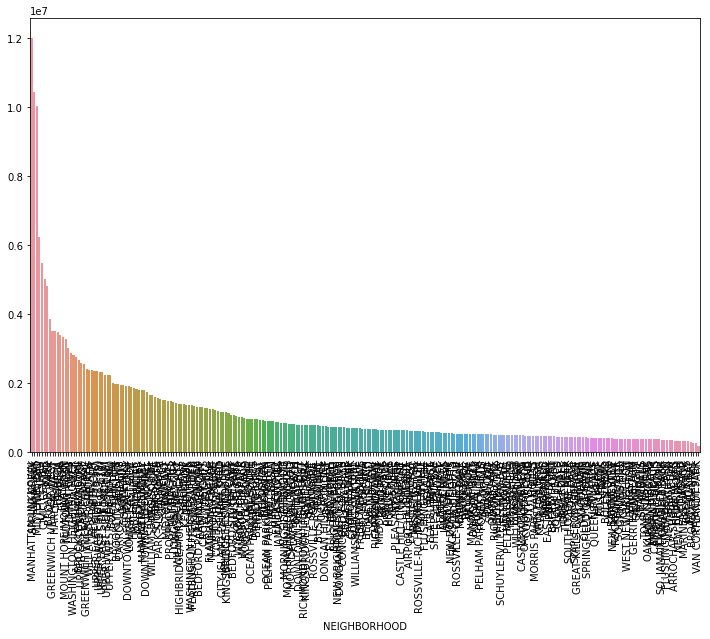

In [88]:
# Let's groupby NEIGHBORHOOD and get the mean of SALE PRICE and plot it using seaborn
plt.figure(figsize=(12,8))
sns.barplot(x=df.groupby('NEIGHBORHOOD').mean()['SALE PRICE'].sort_values(ascending=False).index, y=df.groupby('NEIGHBORHOOD').mean()['SALE PRICE'].sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.show()


# Let's try doing some time series analysis

In [89]:
# Going to only get NEIGHBORHOODS SALE DATE and SALE PRICE
df_time = df[['NEIGHBORHOOD', 'SALE DATE', 'SALE PRICE']]

# Setting SALE DATE to datetime

df_time['SALE DATE'] = pd.to_datetime(df_time['SALE DATE'])



df_time


/var/folders/l0/978kqtls1gb5jnv3rvxtjpvh0000gn/T/ipykernel_39576/3412692093.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['SALE DATE'] = pd.to_datetime(df_time['SALE DATE'])


NEIGHBORHOOD  SALE DATE  SALE PRICE
1       ALPHABET CITY 2018-05-22   4844809.0
2       ALPHABET CITY 2018-12-03   6100000.0
6       ALPHABET CITY 2018-12-10   8300000.0
7       ALPHABET CITY 2018-09-07  10350000.0
8       ALPHABET CITY 2018-09-05   5000000.0
...               ...        ...         ...
442373        WOODROW 2014-03-31    470000.0
442374        WOODROW 2014-05-05    465000.0
442376        WOODROW 2014-09-11    610000.0
442378        WOODROW 2014-06-06    474000.0
442379        WOODROW 2014-03-21    200000.0

[285068 rows x 3 columns]

In [90]:
# Setting the index to SALE DATE
df_time.reset_index()
#df_time = df_time.rename(columns={'index': 'SALE DATE'})

# Setting the index to datetimeindex
#df_time['SALE DATE'] = pd.to_datetime(df_time['SALE DATE'])
df_time.set_index('SALE DATE', inplace=True)

# Sorting the SALE DATE to be descending
df_time.sort_index(ascending=True, inplace=True)

# Setting columns to NEIGHBORHOOD and SALE PRICE
#df_time = df_time[['NEIGHBORHOOD', 'SALE PRICE']]

df_time.head()

/var/folders/l0/978kqtls1gb5jnv3rvxtjpvh0000gn/T/ipykernel_39576/4113808435.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.sort_index(ascending=True, inplace=True)


NEIGHBORHOOD  SALE PRICE
SALE DATE                                        
2014-01-02               EMERSON HILL   1305396.0
2014-01-02                   ROSEBANK    615625.0
2014-01-02               MIDTOWN EAST   1350000.0
2014-01-02  GREENWICH VILLAGE-CENTRAL   7753973.0
2014-01-02    UPPER EAST SIDE (79-96)    326000.0

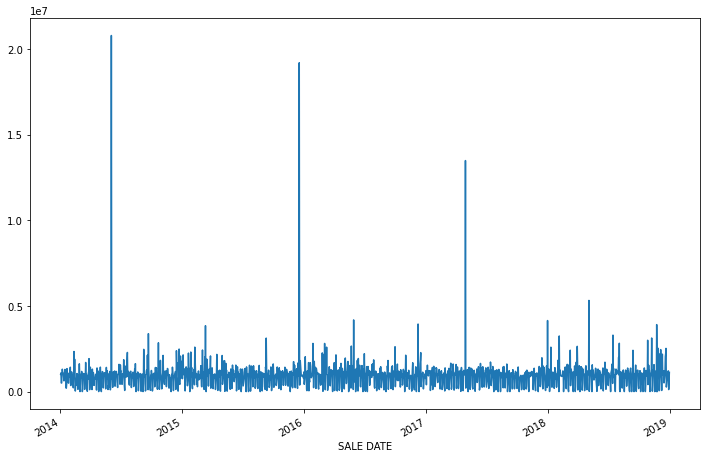

In [91]:
# Need to groupby Date to get the mean of SALE PRICE for each day
df_time.groupby('SALE DATE').mean()['SALE PRICE'].plot(figsize=(12,8))
plt.show()

In [92]:
# Resetting the index
df_time.reset_index(inplace=True)

df_time = df_time.groupby(['SALE DATE', 'NEIGHBORHOOD'], as_index=False).sum()
df_time = df_time.pivot(index='SALE DATE', columns='NEIGHBORHOOD', values='SALE PRICE')
df_time.head()

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY  ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                  
2014-01-02                   NaN            NaN       NaN            NaN   
2014-01-03                   NaN       539000.0  212500.0            NaN   
2014-01-04                   NaN            NaN       NaN            NaN   
2014-01-05                   NaN            NaN       NaN            NaN   
2014-01-06                   NaN            NaN       NaN            NaN   

NEIGHBORHOOD  ARROCHAR  ARROCHAR-SHORE ACRES  ARVERNE    ASTORIA  BATH BEACH  \
SALE DATE                                                                      
2014-01-02         NaN                   NaN      NaN        NaN         NaN   
2014-01-03         NaN                   NaN      NaN        NaN    695000.0   
2014-01-04         NaN                   NaN      NaN        NaN         NaN   
2014-01-05         NaN                   NaN      NaN        NaN         NaN   
2014-01-06         NaN                   NaN      NaN  1150000.0    765000.0   

NEIGHBORHOOD  BATHGATE  ...  WILLIAMSBURG-EAST  WILLIAMSBURG-NORTH  \
SALE DATE               ...                                          
2014-01-02         NaN  ...           850000.0           1750000.0   
2014-01-03         NaN  ...                NaN                 NaN   
2014-01-04         NaN  ...                NaN                 NaN   
2014-01-05         NaN  ...                NaN                 NaN   
2014-01-06         NaN  ...          1451410.0           1100000.0   

NEIGHBORHOOD  WILLIAMSBURG-SOUTH  WILLOWBROOK  WINDSOR TERRACE  WOODHAVEN  \
SALE DATE                                                                   
2014-01-02              383500.0          NaN         365000.0  1146500.0   
2014-01-03                   NaN          NaN         946000.0        NaN   
2014-01-04                   NaN          NaN              NaN        NaN   
2014-01-05                   NaN          NaN              NaN        NaN   
2014-01-06             1550000.0     350000.0              NaN   921000.0   

NEIGHBORHOOD  WOODLAWN    WOODROW   WOODSIDE  WYCKOFF HEIGHTS  
SALE DATE                                                      
2014-01-02         NaN        NaN  1061178.0              NaN  
2014-01-03         NaN  1046909.0  1756113.0              NaN  
2014-01-04         NaN        NaN        NaN              NaN  
2014-01-05         NaN        NaN        NaN              NaN  
2014-01-06         NaN   456199.0        NaN              NaN  

[5 rows x 255 columns]

In [93]:
df_time = df_time.reset_index()

In [94]:
df_time.set_index('SALE DATE', inplace=True)
df_time.head()

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY  ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                  
2014-01-02                   NaN            NaN       NaN            NaN   
2014-01-03                   NaN       539000.0  212500.0            NaN   
2014-01-04                   NaN            NaN       NaN            NaN   
2014-01-05                   NaN            NaN       NaN            NaN   
2014-01-06                   NaN            NaN       NaN            NaN   

NEIGHBORHOOD  ARROCHAR  ARROCHAR-SHORE ACRES  ARVERNE    ASTORIA  BATH BEACH  \
SALE DATE                                                                      
2014-01-02         NaN                   NaN      NaN        NaN         NaN   
2014-01-03         NaN                   NaN      NaN        NaN    695000.0   
2014-01-04         NaN                   NaN      NaN        NaN         NaN   
2014-01-05         NaN                   NaN      NaN        NaN         NaN   
2014-01-06         NaN                   NaN      NaN  1150000.0    765000.0   

NEIGHBORHOOD  BATHGATE  ...  WILLIAMSBURG-EAST  WILLIAMSBURG-NORTH  \
SALE DATE               ...                                          
2014-01-02         NaN  ...           850000.0           1750000.0   
2014-01-03         NaN  ...                NaN                 NaN   
2014-01-04         NaN  ...                NaN                 NaN   
2014-01-05         NaN  ...                NaN                 NaN   
2014-01-06         NaN  ...          1451410.0           1100000.0   

NEIGHBORHOOD  WILLIAMSBURG-SOUTH  WILLOWBROOK  WINDSOR TERRACE  WOODHAVEN  \
SALE DATE                                                                   
2014-01-02              383500.0          NaN         365000.0  1146500.0   
2014-01-03                   NaN          NaN         946000.0        NaN   
2014-01-04                   NaN          NaN              NaN        NaN   
2014-01-05                   NaN          NaN              NaN        NaN   
2014-01-06             1550000.0     350000.0              NaN   921000.0   

NEIGHBORHOOD  WOODLAWN    WOODROW   WOODSIDE  WYCKOFF HEIGHTS  
SALE DATE                                                      
2014-01-02         NaN        NaN  1061178.0              NaN  
2014-01-03         NaN  1046909.0  1756113.0              NaN  
2014-01-04         NaN        NaN        NaN              NaN  
2014-01-05         NaN        NaN        NaN              NaN  
2014-01-06         NaN   456199.0        NaN              NaN  

[5 rows x 255 columns]

In [95]:
# Let's fill NaN values with 0
df_time.fillna(0, inplace=True)
df_time.head()

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY  ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                  
2014-01-02                   0.0            0.0       0.0            0.0   
2014-01-03                   0.0       539000.0  212500.0            0.0   
2014-01-04                   0.0            0.0       0.0            0.0   
2014-01-05                   0.0            0.0       0.0            0.0   
2014-01-06                   0.0            0.0       0.0            0.0   

NEIGHBORHOOD  ARROCHAR  ARROCHAR-SHORE ACRES  ARVERNE    ASTORIA  BATH BEACH  \
SALE DATE                                                                      
2014-01-02         0.0                   0.0      0.0        0.0         0.0   
2014-01-03         0.0                   0.0      0.0        0.0    695000.0   
2014-01-04         0.0                   0.0      0.0        0.0         0.0   
2014-01-05         0.0                   0.0      0.0        0.0         0.0   
2014-01-06         0.0                   0.0      0.0  1150000.0    765000.0   

NEIGHBORHOOD  BATHGATE  ...  WILLIAMSBURG-EAST  WILLIAMSBURG-NORTH  \
SALE DATE               ...                                          
2014-01-02         0.0  ...           850000.0           1750000.0   
2014-01-03         0.0  ...                0.0                 0.0   
2014-01-04         0.0  ...                0.0                 0.0   
2014-01-05         0.0  ...                0.0                 0.0   
2014-01-06         0.0  ...          1451410.0           1100000.0   

NEIGHBORHOOD  WILLIAMSBURG-SOUTH  WILLOWBROOK  WINDSOR TERRACE  WOODHAVEN  \
SALE DATE                                                                   
2014-01-02              383500.0          0.0         365000.0  1146500.0   
2014-01-03                   0.0          0.0         946000.0        0.0   
2014-01-04                   0.0          0.0              0.0        0.0   
2014-01-05                   0.0          0.0              0.0        0.0   
2014-01-06             1550000.0     350000.0              0.0   921000.0   

NEIGHBORHOOD  WOODLAWN    WOODROW   WOODSIDE  WYCKOFF HEIGHTS  
SALE DATE                                                      
2014-01-02         0.0        0.0  1061178.0              0.0  
2014-01-03         0.0  1046909.0  1756113.0              0.0  
2014-01-04         0.0        0.0        0.0              0.0  
2014-01-05         0.0        0.0        0.0              0.0  
2014-01-06         0.0   456199.0        0.0              0.0  

[5 rows x 255 columns]

In [96]:
# Let's resample the date to be monthly by year
df_time = df_time.resample('M').sum()
df_time.head()

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY   ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                   
2014-01-31              297000.0      5075623.0  5436028.0      3565146.0   
2014-02-28                   0.0      9284500.0  2604691.0      5214111.0   
2014-03-31                   0.0     20482175.0  7863038.0      5608208.0   
2014-04-30                   0.0      6639000.0  7308596.0      4516096.0   
2014-05-31              664000.0     10543500.0  7307786.0      5579960.0   

NEIGHBORHOOD  ARROCHAR  ARROCHAR-SHORE ACRES    ARVERNE     ASTORIA  \
SALE DATE                                                             
2014-01-31    782400.0              515500.0  5386115.0  21695358.0   
2014-02-28    218000.0                   2.0  1567115.0  28876758.0   
2014-03-31    439888.0              183000.0  3391856.0  30117315.0   
2014-04-30    430000.0              283975.0  3450060.0  35488378.0   
2014-05-31     87500.0              492000.0  6829315.0  36077383.0   

NEIGHBORHOOD  BATH BEACH   BATHGATE  ...  WILLIAMSBURG-EAST  \
SALE DATE                            ...                      
2014-01-31    15438825.0  1005010.0  ...         25588193.0   
2014-02-28     7012311.0   580000.0  ...          9343233.0   
2014-03-31    10396489.0  1150000.0  ...          9021682.0   
2014-04-30     6780059.0  1130000.0  ...         33809500.0   
2014-05-31    17062595.0   850000.0  ...         55971010.0   

NEIGHBORHOOD  WILLIAMSBURG-NORTH  WILLIAMSBURG-SOUTH  WILLOWBROOK  \
SALE DATE                                                           
2014-01-31            17643871.0          58930937.0    5863621.0   
2014-02-28            17184030.0          15797010.0    1904000.0   
2014-03-31            23036412.0           7045000.0    3902000.0   
2014-04-30            33876079.0          14094787.0    2700814.0   
2014-05-31            30793869.0          11329000.0    4962900.0   

NEIGHBORHOOD  WINDSOR TERRACE   WOODHAVEN    WOODLAWN    WOODROW    WOODSIDE  \
SALE DATE                                                                      
2014-01-31          8721273.0   7675198.0    536000.0  4518935.0  15687248.0   
2014-02-28         10879687.0   3102000.0    802500.0  2686059.0   9263939.0   
2014-03-31          4864000.0  10337655.0    440000.0  1717104.0   9822268.0   
2014-04-30          3093810.0   6203600.0  10569300.0  1896104.0   5409657.0   
2014-05-31          5387000.0   5080010.0   1055763.0  1399880.0  19821353.0   

NEIGHBORHOOD  WYCKOFF HEIGHTS  
SALE DATE                      
2014-01-31          2237000.0  
2014-02-28          4993000.0  
2014-03-31          4429875.0  
2014-04-30          4808737.0  
2014-05-31          4312010.0  

[5 rows x 255 columns]

In [97]:
# Define a function to detrend the data using linear regression
def detrend_linear_regression(y):
    t = np.arange(len(y)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(t, y)
    y_pred = model.predict(t)
    return y - y_pred

detrend_data = df_time.apply(detrend_linear_regression, axis=1)
detrend_data.head()

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY      ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                      
2014-01-31         -1.124486e+07  -6.526012e+06 -6.225384e+06  -8.156043e+06   
2014-02-28         -1.032580e+07  -1.094336e+06 -7.827183e+06  -5.270802e+06   
2014-03-31         -1.061411e+07   9.811117e+06 -2.864966e+06  -5.176743e+06   
2014-04-30         -1.049654e+07  -3.907669e+06 -3.288199e+06  -6.130825e+06   
2014-05-31         -9.607651e+06   2.013666e+05 -3.104830e+06  -4.903138e+06   

NEIGHBORHOOD      ARROCHAR  ARROCHAR-SHORE ACRES       ARVERNE       ASTORIA  \
SALE DATE                                                                      
2014-01-31   -1.099857e+07         -1.132524e+07 -6.514406e+06  9.735059e+06   
2014-02-28   -1.031995e+07         -1.059099e+07 -9.076913e+06  1.817969e+07   
2014-03-31   -1.040201e+07         -1.071584e+07 -7.563933e+06  1.910458e+07   
2014-04-30   -1.026705e+07         -1.046320e+07 -7.347239e+06  2.464095e+07   
2014-05-31   -1.046608e+07         -1.013206e+07 -3.865230e+06  2.531236e+07   

NEIGHBORHOOD    BATH BEACH      BATHGATE  ...  WILLIAMSBURG-EAST  \
SALE DATE                                 ...                      
2014-01-31    3.418749e+06 -1.107484e+07  ...      -5.991153e+05   
2014-02-28   -3.737794e+06 -1.022314e+07  ...      -1.397698e+07   
2014-03-31   -6.731922e+05 -9.976627e+06  ...      -1.554423e+07   
2014-04-30   -4.117492e+06 -9.817677e+06  ...       1.103209e+07   
2014-05-31    6.227085e+06 -1.005599e+07  ...       2.843118e+07   

NEIGHBORHOOD  WILLIAMSBURG-NORTH  WILLIAMSBURG-SOUTH   WILLOWBROOK  \
SALE DATE                                                            
2014-01-31         -8.603215e+06        3.262407e+07 -2.050302e+07   
2014-02-28         -6.189220e+06       -7.629279e+06 -2.157533e+07   
2014-03-31         -1.586451e+06       -1.763481e+07 -2.083476e+07   
2014-04-30          1.104854e+07       -8.782879e+06 -2.022698e+07   
2014-05-31          3.183555e+06       -1.635180e+07 -2.278838e+07   

NEIGHBORHOOD  WINDSOR TERRACE     WOODHAVEN      WOODLAWN       WOODROW  \
SALE DATE                                                                 
2014-01-31      -1.770514e+07 -1.881100e+07 -2.600997e+07 -2.208681e+07   
2014-02-28      -1.265268e+07 -2.048340e+07 -2.283594e+07 -2.100542e+07   
2014-03-31      -1.992970e+07 -1.451299e+07 -2.446759e+07 -2.324744e+07   
2014-04-30      -1.988411e+07 -1.682444e+07 -1.250887e+07 -2.123219e+07   
2014-05-31      -2.243476e+07 -2.281223e+07 -2.690696e+07 -2.663333e+07   

NEIGHBORHOOD      WOODSIDE  WYCKOFF HEIGHTS  
SALE DATE                                    
2014-01-31   -1.097828e+07    -2.448830e+07  
2014-02-28   -1.448058e+07    -1.880456e+07  
2014-03-31   -1.519922e+07    -2.064856e+07  
2014-04-30   -1.776877e+07    -1.841981e+07  
2014-05-31   -8.282338e+06    -2.386216e+07  

[5 rows x 255 columns]

In [98]:
import numpy as np

def apply_fft_filter(data, freq_threshold):
    fft_data = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(data))

    # Filter out high-frequency noise
    fft_data_filtered = np.where(np.abs(frequencies) > freq_threshold, 0, fft_data)

    # Inverse FFT to reconstruct the time-series
    filtered_data = np.fft.ifft(fft_data_filtered)
    
    return filtered_data.real  # Return only the real part of the data

# Set a frequency threshold
freq_threshold = 0.1

# Apply FFT and filtering to each neighborhood
filtered_data = detrend_data.apply(lambda x: apply_fft_filter(x, freq_threshold), axis=0)

In [99]:
filtered_data

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY      ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                      
2014-01-31         -1.158099e+07   1.348720e+07 -3.807136e+06  -5.693408e+06   
2014-02-28         -1.174990e+07   6.486000e+06 -4.224698e+06  -6.610175e+06   
2014-03-31         -1.200225e+07  -9.176506e+05 -4.823463e+06  -7.227603e+06   
2014-04-30         -1.228739e+07  -6.516156e+06 -5.524799e+06  -7.565810e+06   
2014-05-31         -1.260604e+07  -8.335641e+06 -6.256509e+06  -7.768755e+06   
2014-06-30         -1.299376e+07  -5.373268e+06 -6.965200e+06  -8.029525e+06   
2014-07-31         -1.348364e+07   1.961683e+06 -7.619212e+06  -8.497519e+06   
2014-08-31         -1.406719e+07   1.188293e+07 -8.202842e+06  -9.205144e+06   
2014-09-30         -1.467361e+07   2.174720e+07 -8.705958e+06  -1.004370e+07   
2014-10-31         -1.518008e+07   2.888883e+07 -9.114767e+06  -1.079879e+07   
2014-11-30         -1.545259e+07   3.147913e+07 -9.408775e+06  -1.123227e+07   
2014-12-31         -1.540255e+07   2.910629e+07 -9.566151e+06  -1.117942e+07   
2015-01-31         -1.503630e+07   2.286998e+07 -9.575764e+06  -1.062351e+07   
2015-02-28         -1.447488e+07   1.495870e+07 -9.450782e+06  -9.718248e+06   
2015-03-31         -1.393163e+07   7.865628e+06 -9.237149e+06  -8.747682e+06   
2015-04-30         -1.365095e+07   3.528026e+06 -9.011436e+06  -8.036807e+06   
2015-05-31         -1.382717e+07   2.700271e+06 -8.866058e+06  -7.844453e+06   
2015-06-30         -1.453188e+07   4.780628e+06 -8.884642e+06  -8.276916e+06   
2015-07-31         -1.567727e+07   8.141712e+06 -9.114591e+06  -9.253138e+06   
2015-08-31         -1.703126e+07   1.082754e+07 -9.546003e+06  -1.053332e+07   
2015-09-30         -1.828258e+07   1.134615e+07 -1.010514e+07  -1.179971e+07   
2015-10-31         -1.913551e+07   9.255883e+06 -1.066661e+07  -1.275981e+07   
2015-11-30         -1.940276e+07   5.325692e+06 -1.108271e+07  -1.323481e+07   
2015-12-31         -1.906450e+07   1.214684e+06 -1.122254e+07  -1.320309e+07   
2016-01-31         -1.827287e+07  -1.200797e+06 -1.101006e+07  -1.278593e+07   
2016-02-29         -1.729998e+07  -5.906216e+05 -1.044961e+07  -1.218494e+07   
2016-03-31         -1.644741e+07   3.270072e+06 -9.630870e+06  -1.159782e+07   
2016-04-30         -1.594857e+07   9.362132e+06 -8.711061e+06  -1.114611e+07   
2016-05-31         -1.589749e+07   1.575925e+07 -7.878691e+06  -1.084211e+07   
2016-06-30         -1.622802e+07   2.031483e+07 -7.308600e+06  -1.060506e+07   
2016-07-31         -1.674903e+07   2.144067e+07 -7.120409e+06  -1.031678e+07   
2016-08-31         -1.722108e+07   1.868494e+07 -7.351232e+06  -9.890746e+06   
2016-09-30         -1.744575e+07   1.289327e+07 -7.949202e+06  -9.323908e+06   
2016-10-31         -1.733474e+07   5.894504e+06 -8.788355e+06  -8.708035e+06   
2016-11-30         -1.693438e+07  -1.687233e+05 -9.699673e+06  -8.194696e+06   
2016-12-31         -1.639832e+07  -3.612289e+06 -1.050930e+07  -7.927743e+06   
2017-01-31         -1.592045e+07  -3.797294e+06 -1.107401e+07  -7.971594e+06   
2017-02-28         -1.565483e+07  -1.315817e+06 -1.130605e+07  -8.266669e+06   
2017-03-31         -1.565374e+07   2.286393e+06 -1.118314e+07  -8.633552e+06   
2017-04-30         -1.584731e+07   5.137476e+06 -1.074409e+07  -8.828476e+06   
2017-05-31         -1.607237e+07   5.774361e+06 -1.007354e+07  -8.631814e+06   
2017-06-30         -1.613881e+07   3.705641e+06 -9.281329e+06  -7.936806e+06   
2017-07-31         -1.590787e+07  -4.071190e+05 -8.481640e+06  -6.803572e+06   
2017-08-31         -1.535203e+07  -5.010940e+06 -7.775386e+06  -5.454915e+06   
2017-09-30         -1.457323e+07  -8.257954e+06 -7.237529e+06  -4.211540e+06   
2017-10-31         -1.377188e+07  -8.703703e+06 -6.909289e+06  -3.387197e+06   
2017-11-30         -1.317766e+07  -5.839875e+06 -6.794698e+06  -3.180253e+06   
2017-12-31         -1.296734e+07  -2.629925e+05 -6.861146e+06  -3.601032e+06   


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reshape and scale the data
X = filtered_data.T.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
n_clusters = 6  # Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
clustered_data = filtered_data.T.copy()
clustered_data['Cluster'] = labels

/var/folders/l0/978kqtls1gb5jnv3rvxtjpvh0000gn/T/ipykernel_39576/4230012593.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


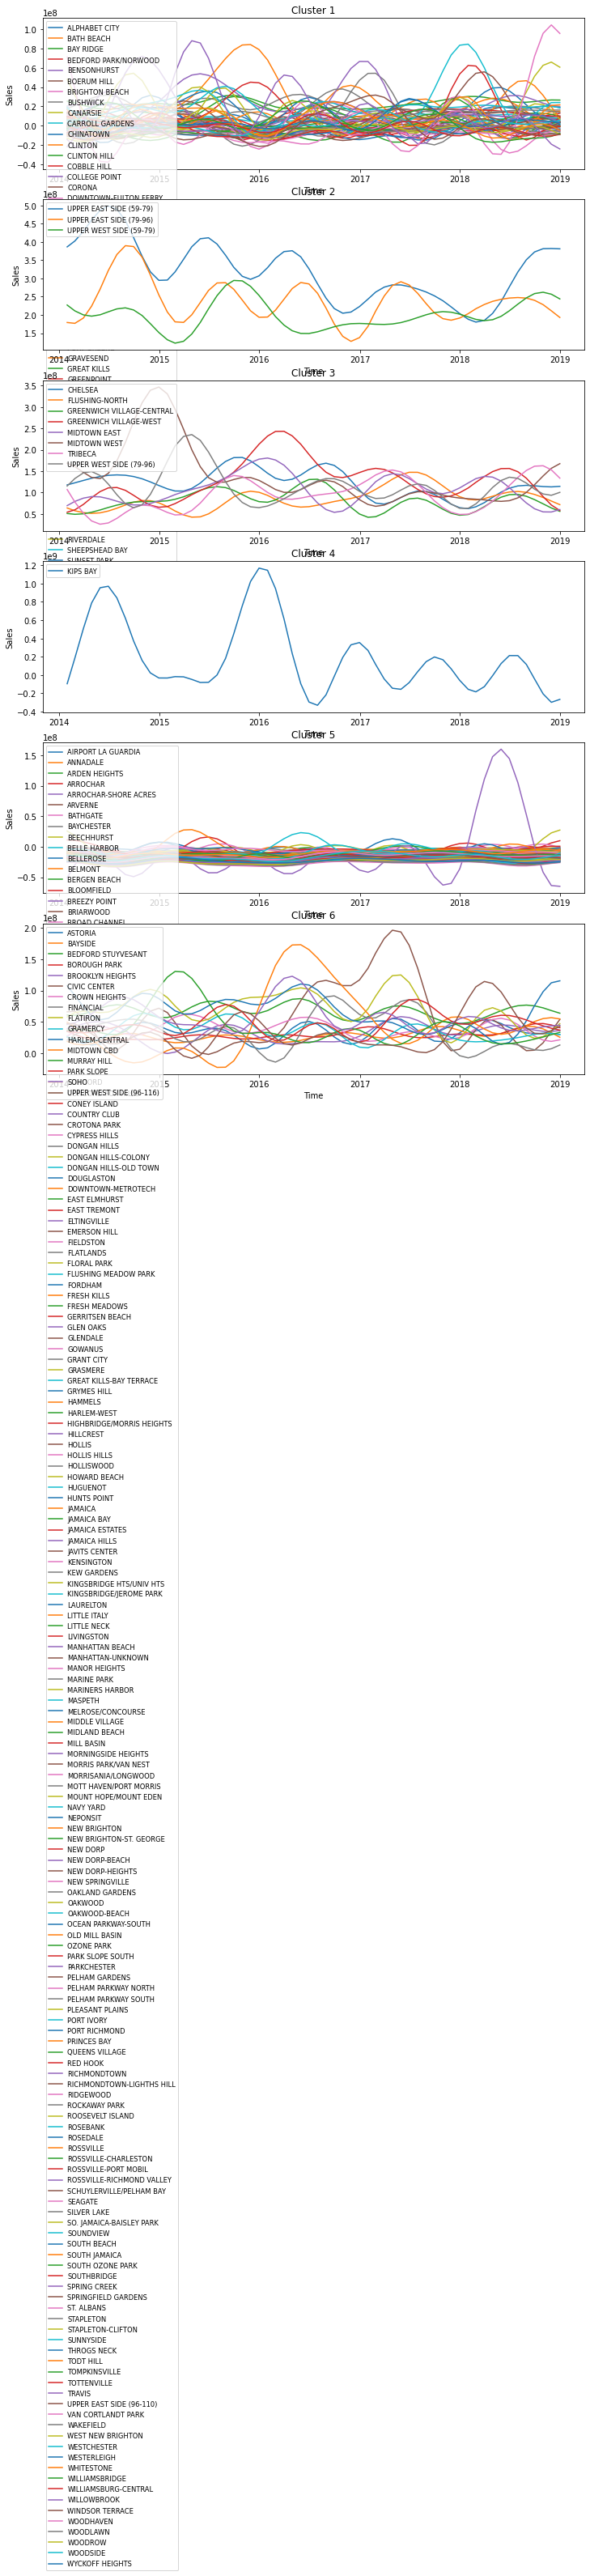

In [120]:
import matplotlib.pyplot as plt

# Function to plot the trends within each cluster
def plot_clusters(clustered_data, n_clusters):
    fig, axs = plt.subplots(n_clusters, figsize=(12, n_clusters * 4))

    for i in range(n_clusters):
        cluster_data = clustered_data[clustered_data['Cluster'] == i].drop(columns=['Cluster'])
        for neighborhood, time_series in cluster_data.iterrows():
            axs[i].plot(time_series, label=neighborhood)
        
        axs[i].set_title(f'Cluster {i + 1}')
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('Sales')
        axs[i].legend(loc='upper left', fontsize='small')

    plt.tight_layout()
    plt.show()

# Visualize the clusters
plot_clusters(clustered_data, n_clusters)

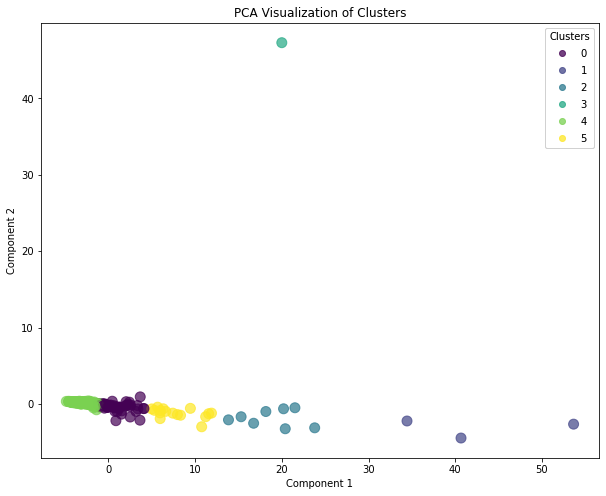

In [121]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def visualize_clusters_2D(X_scaled, labels, method='pca'):
    if method == 'pca':
        reducer = PCA(n_components=2)
        title = 'PCA Visualization of Clusters'
    elif method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)
        title = 't-SNE Visualization of Clusters'
    else:
        raise ValueError("Invalid method. Choose 'pca' or 'tsne'.")

    X_reduced = reducer.fit_transform(X_scaled)

    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)

    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

    legend1 = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend1)
    plt.show()

# Visualize the clusters using PCA
visualize_clusters_2D(X_scaled, labels, method='pca')

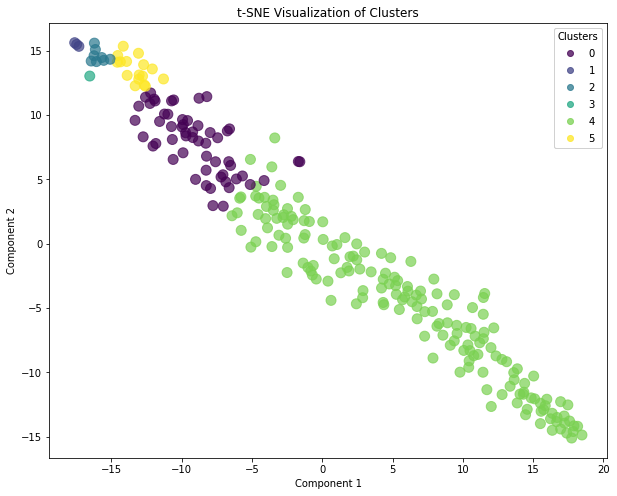

In [122]:
# Visualize the clusters using t-SNE
visualize_clusters_2D(X_scaled, labels, method='tsne')

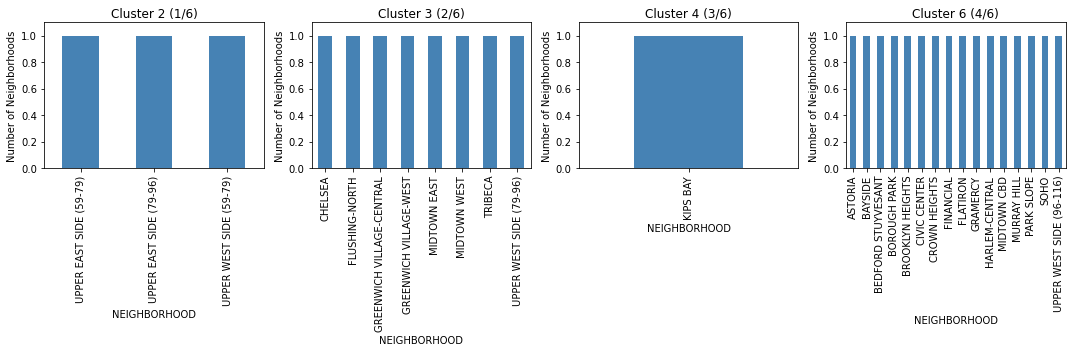

In [153]:
# Assuming your clustered_data DataFrame has a 'Borough' column with the borough name
def plot_borough_counts(clustered_data, top_clusters, n_clusters):
    fig, axs = plt.subplots(1, len(top_clusters), figsize=(15, 5))

    for i, cluster in enumerate(top_clusters):
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
        borough_counts = cluster_data.index.value_counts()
        borough_counts.plot(kind='bar', ax=axs[i], color='steelblue')
        
        axs[i].set_title(f'Cluster {cluster + 1} ({i + 1}/{n_clusters})')
        axs[i].set_xlabel('NEIGHBORHOOD')
        axs[i].set_ylabel('Number of Neighborhoods')
        axs[i].set_ylim(0, max(borough_counts) * 1.1)
        #for j, v in enumerate(borough_counts):
            #axs[i].text(j - 0.25, v + 0.25, str(v), color='black')

    plt.tight_layout()
    plt.show()


# Change the list [0, 1, 2] to the indices of your top three clusters
plot_borough_counts(clustered_data, top_clusters=[1, 2,3, 5], n_clusters=n_clusters)

In [141]:
# Reset the index of clustered_data DataFrame
clustered_data_reset = clustered_data.reset_index()

# Define the top three clusters (Replace with the cluster numbers you found)
top_clusters = [1, 2,3, 5]

# Filter the neighborhoods in the top_clusters
top_clusters_data = clustered_data_reset[clustered_data_reset['Cluster'].isin(top_clusters)]

# Display the neighborhoods in the top_clusters
for cluster in top_clusters:
    print(f"Cluster {cluster}:")
    neighborhoods = top_clusters_data[top_clusters_data['Cluster'] == cluster]['NEIGHBORHOOD'].tolist()
    print(", ".join(neighborhoods))
    print()

Cluster 1:
UPPER EAST SIDE (59-79), UPPER EAST SIDE (79-96), UPPER WEST SIDE (59-79)

Cluster 2:
CHELSEA, FLUSHING-NORTH, GREENWICH VILLAGE-CENTRAL, GREENWICH VILLAGE-WEST, MIDTOWN EAST, MIDTOWN WEST, TRIBECA, UPPER WEST SIDE (79-96)

Cluster 3:
KIPS BAY

Cluster 5:
ASTORIA, BAYSIDE, BEDFORD STUYVESANT, BOROUGH PARK, BROOKLYN HEIGHTS, CIVIC CENTER, CROWN HEIGHTS, FINANCIAL, FLATIRON, GRAMERCY, HARLEM-CENTRAL, MIDTOWN CBD, MURRAY HILL, PARK SLOPE, SOHO, UPPER WEST SIDE (96-116)



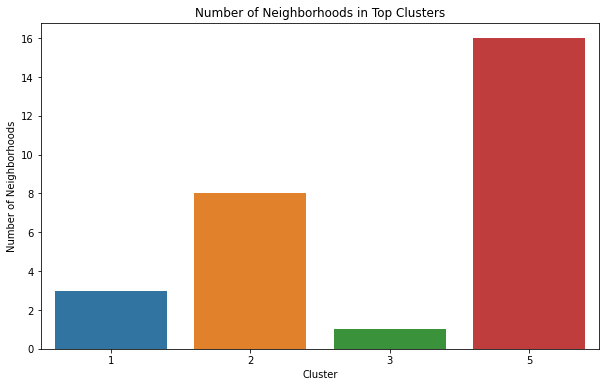

In [142]:
# Count the number of neighborhoods in each cluster
cluster_counts = top_clusters_data['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Neighborhood Count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_counts, x='Cluster', y='Neighborhood Count', color='')
plt.title('Number of Neighborhoods in Top Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Neighborhoods')
plt.show()

In [143]:
def display_neighborhoods_by_cluster(data):
    grouped_data = data.groupby('Cluster')['NEIGHBORHOOD'].apply(list)
    for cluster, neighborhoods in grouped_data.iteritems():
        print(f"Cluster {cluster}:")
        formatted_neighborhoods = ", ".join(neighborhoods)
        print(formatted_neighborhoods)
        print("\n")

# Call the function with the top_clusters_data
display_neighborhoods_by_cluster(top_clusters_data)

Cluster 1:
UPPER EAST SIDE (59-79), UPPER EAST SIDE (79-96), UPPER WEST SIDE (59-79)


Cluster 2:
CHELSEA, FLUSHING-NORTH, GREENWICH VILLAGE-CENTRAL, GREENWICH VILLAGE-WEST, MIDTOWN EAST, MIDTOWN WEST, TRIBECA, UPPER WEST SIDE (79-96)


Cluster 3:
KIPS BAY


Cluster 5:
ASTORIA, BAYSIDE, BEDFORD STUYVESANT, BOROUGH PARK, BROOKLYN HEIGHTS, CIVIC CENTER, CROWN HEIGHTS, FINANCIAL, FLATIRON, GRAMERCY, HARLEM-CENTRAL, MIDTOWN CBD, MURRAY HILL, PARK SLOPE, SOHO, UPPER WEST SIDE (96-116)




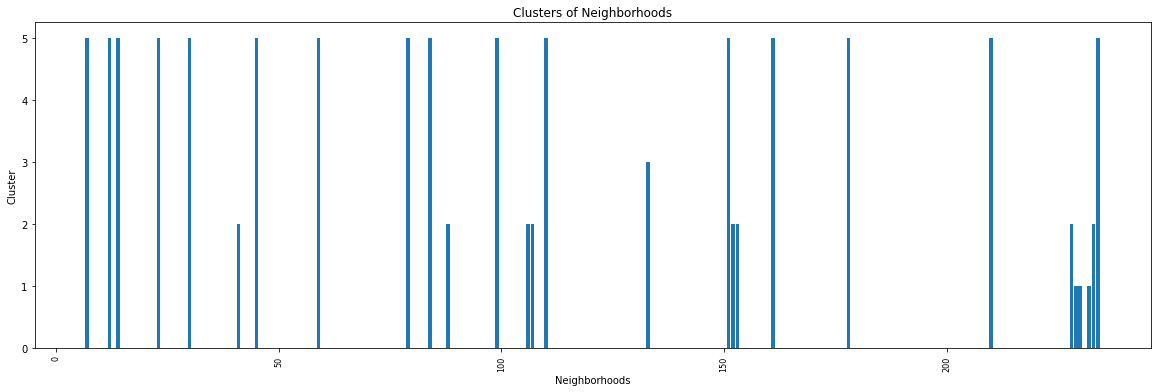

In [144]:
import matplotlib.pyplot as plt

def plot_neighborhood_clusters(data):
    neighborhoods = data.index
    clusters = data['Cluster']

    plt.figure(figsize=(20, 6))
    plt.bar(neighborhoods, clusters)
    plt.xticks(rotation=90, fontsize=8)
    plt.xlabel('Neighborhoods')
    plt.ylabel('Cluster')
    plt.title('Clusters of Neighborhoods')

# Call the function with the top_clusters_data
plot_neighborhood_clusters(top_clusters_data)

In [ ]:
# Let's 

In [131]:
clustered_data

SALE DATE           2014-01-31 00:00:00  2014-02-28 00:00:00  \
NEIGHBORHOOD                                                   
AIRPORT LA GUARDIA        -1.158099e+07        -1.174990e+07   
ALPHABET CITY              1.348720e+07         6.486000e+06   
ANNADALE                  -3.807136e+06        -4.224698e+06   
ARDEN HEIGHTS             -5.693408e+06        -6.610175e+06   
ARROCHAR                  -1.118918e+07        -1.158579e+07   
...                                 ...                  ...   
WOODHAVEN                 -1.693916e+07        -1.885545e+07   
WOODLAWN                  -2.474996e+07        -2.489694e+07   
WOODROW                   -2.174938e+07        -2.353915e+07   
WOODSIDE                  -1.426874e+07        -1.518184e+07   
WYCKOFF HEIGHTS           -2.406363e+07        -2.386972e+07   

SALE DATE           2014-03-31 00:00:00  2014-04-30 00:00:00  \
NEIGHBORHOOD                                                   
AIRPORT LA GUARDIA        -1.200225e+07        -1.228739e+07   
ALPHABET CITY             -9.176506e+05        -6.516156e+06   
ANNADALE                  -4.823463e+06        -5.524799e+06   
ARDEN HEIGHTS             -7.227603e+06        -7.565810e+06   
ARROCHAR                  -1.209649e+07        -1.257002e+07   
...                                 ...                  ...   
WOODHAVEN                 -2.110776e+07        -2.328768e+07   
WOODLAWN                  -2.601653e+07        -2.786252e+07   
WOODROW                   -2.599237e+07        -2.860013e+07   
WOODSIDE                  -1.711233e+07        -1.950696e+07   
WYCKOFF HEIGHTS           -2.432962e+07        -2.534509e+07   

SALE DATE           2014-05-31 00:00:00  2014-06-30 00:00:00  \
NEIGHBORHOOD                                                   
AIRPORT LA GUARDIA        -1.260604e+07        -1.299376e+07   
ALPHABET CITY             -8.335641e+06        -5.373268e+06   
ANNADALE                  -6.256509e+06        -6.965200e+06   
ARDEN HEIGHTS             -7.768755e+06        -8.029525e+06   
ARROCHAR                  -1.292090e+07        -1.314512e+07   
...                                 ...                  ...   
WOODHAVEN                 -2.494518e+07        -2.571189e+07   
WOODLAWN                  -2.994283e+07        -3.166153e+07   
WOODROW                   -3.077097e+07        -3.200375e+07   
WOODSIDE                  -2.166259e+07        -2.295084e+07   
WYCKOFF HEIGHTS           -2.660887e+07        -2.769187e+07   

SALE DATE           2014-07-31 00:00:00  2014-08-31 00:00:00  \
NEIGHBORHOOD                                                   
AIRPORT LA GUARDIA        -1.348364e+07        -1.406719e+07   
ALPHABET CITY              1.961683e+06         1.188293e+07   
ANNADALE                  -7.619212e+06        -8.202842e+06   
ARDEN HEIGHTS             -8.497519e+06        -9.205144e+06   
ARROCHAR                  -1.329933e+07        -1.345617e+07   
...                                 ...                  ...   
WOODHAVEN                 -2.541028e+07        -2.411219e+07   
WOODLAWN                  -3.250204e+07        -3.219139e+07   
WOODROW                   -3.203647e+07        -3.092292e+07   
WOODSIDE                  -2.301439e+07        -2.187051e+07   
WYCKOFF HEIGHTS           -2.817356e+07        -2.777427e+07   

SALE DATE           2014-09-30 00:00:00  2014-10-31 00:00:00  ...  \
NEIGHBORHOOD                                                  ...   
AIRPORT LA GUARDIA        -1.467361e+07        -1.518008e+07  ...   
ALPHABET CITY              2.174720e+07         2.888883e+07  ...   
ANNADALE                  -8.705958e+06        -9.114767e+06  ...   
ARDEN HEIGHTS             -1.004370e+07        -1.079879e+07  ...   
ARROCHAR                  -1.365761e+07        -1.388795e+07  ...   
...                                 ...                  ...  ...   
WOODHAVEN                 -2.212488e+07        -1.990649e+07  ...   
WOODLAWN                  -3.079005e+07        

In [138]:
# Groupby Neighborhood and Cluster, sum the values and unstack
clustered_data



SALE DATE           2014-01-31 00:00:00  2014-02-28 00:00:00  \
NEIGHBORHOOD                                                   
AIRPORT LA GUARDIA        -1.158099e+07        -1.174990e+07   
ALPHABET CITY              1.348720e+07         6.486000e+06   
ANNADALE                  -3.807136e+06        -4.224698e+06   
ARDEN HEIGHTS             -5.693408e+06        -6.610175e+06   
ARROCHAR                  -1.118918e+07        -1.158579e+07   
...                                 ...                  ...   
WOODHAVEN                 -1.693916e+07        -1.885545e+07   
WOODLAWN                  -2.474996e+07        -2.489694e+07   
WOODROW                   -2.174938e+07        -2.353915e+07   
WOODSIDE                  -1.426874e+07        -1.518184e+07   
WYCKOFF HEIGHTS           -2.406363e+07        -2.386972e+07   

SALE DATE           2014-03-31 00:00:00  2014-04-30 00:00:00  \
NEIGHBORHOOD                                                   
AIRPORT LA GUARDIA        -1.200225e+07        -1.228739e+07   
ALPHABET CITY             -9.176506e+05        -6.516156e+06   
ANNADALE                  -4.823463e+06        -5.524799e+06   
ARDEN HEIGHTS             -7.227603e+06        -7.565810e+06   
ARROCHAR                  -1.209649e+07        -1.257002e+07   
...                                 ...                  ...   
WOODHAVEN                 -2.110776e+07        -2.328768e+07   
WOODLAWN                  -2.601653e+07        -2.786252e+07   
WOODROW                   -2.599237e+07        -2.860013e+07   
WOODSIDE                  -1.711233e+07        -1.950696e+07   
WYCKOFF HEIGHTS           -2.432962e+07        -2.534509e+07   

SALE DATE           2014-05-31 00:00:00  2014-06-30 00:00:00  \
NEIGHBORHOOD                                                   
AIRPORT LA GUARDIA        -1.260604e+07        -1.299376e+07   
ALPHABET CITY             -8.335641e+06        -5.373268e+06   
ANNADALE                  -6.256509e+06        -6.965200e+06   
ARDEN HEIGHTS             -7.768755e+06        -8.029525e+06   
ARROCHAR                  -1.292090e+07        -1.314512e+07   
...                                 ...                  ...   
WOODHAVEN                 -2.494518e+07        -2.571189e+07   
WOODLAWN                  -2.994283e+07        -3.166153e+07   
WOODROW                   -3.077097e+07        -3.200375e+07   
WOODSIDE                  -2.166259e+07        -2.295084e+07   
WYCKOFF HEIGHTS           -2.660887e+07        -2.769187e+07   

SALE DATE           2014-07-31 00:00:00  2014-08-31 00:00:00  \
NEIGHBORHOOD                                                   
AIRPORT LA GUARDIA        -1.348364e+07        -1.406719e+07   
ALPHABET CITY              1.961683e+06         1.188293e+07   
ANNADALE                  -7.619212e+06        -8.202842e+06   
ARDEN HEIGHTS             -8.497519e+06        -9.205144e+06   
ARROCHAR                  -1.329933e+07        -1.345617e+07   
...                                 ...                  ...   
WOODHAVEN                 -2.541028e+07        -2.411219e+07   
WOODLAWN                  -3.250204e+07        -3.219139e+07   
WOODROW                   -3.203647e+07        -3.092292e+07   
WOODSIDE                  -2.301439e+07        -2.187051e+07   
WYCKOFF HEIGHTS           -2.817356e+07        -2.777427e+07   

SALE DATE           2014-09-30 00:00:00  2014-10-31 00:00:00  ...  \
NEIGHBORHOOD                                                  ...   
AIRPORT LA GUARDIA        -1.467361e+07        -1.518008e+07  ...   
ALPHABET CITY              2.174720e+07         2.888883e+07  ...   
ANNADALE                  -8.705958e+06        -9.114767e+06  ...   
ARDEN HEIGHTS             -1.004370e+07        -1.079879e+07  ...   
ARROCHAR                  -1.365761e+07        -1.388795e+07  ...   
...                                 ...                  ...  ...   
WOODHAVEN                 -2.212488e+07        -1.990649e+07  ...   
WOODLAWN                  -3.079005e+07        

In [25]:
# Now let's calculate the difference in price from the previous month for all neighborhoods
df_time = df_time.cumsum()

# Getting the difference in price from the previous month
df_time = df_time.diff()
# Dropping the first row since it is NaN
df_time.dropna(inplace=True)
df_time.head()

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY   ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                   
2014-02-28                   0.0      9284500.0  2604691.0      5214111.0   
2014-03-31                   0.0     20482175.0  7863038.0      5608208.0   
2014-04-30                   0.0      6639000.0  7308596.0      4516096.0   
2014-05-31              664000.0     10543500.0  7307786.0      5579960.0   
2014-06-30                   0.0      4560000.0  5277000.0      6905962.0   

NEIGHBORHOOD  ARROCHAR  ARROCHAR-SHORE ACRES    ARVERNE     ASTORIA  \
SALE DATE                                                             
2014-02-28    218000.0                   2.0  1567115.0  28876758.0   
2014-03-31    439888.0              183000.0  3391856.0  30117315.0   
2014-04-30    430000.0              283975.0  3450060.0  35488378.0   
2014-05-31     87500.0              492000.0  6829315.0  36077383.0   
2014-06-30    339999.0              708000.0  3595810.0  28339785.0   

NEIGHBORHOOD  BATH BEACH   BATHGATE  ...  WILLIAMSBURG-EAST  \
SALE DATE                            ...                      
2014-02-28     7012311.0   580000.0  ...          9343233.0   
2014-03-31    10396489.0  1150000.0  ...          9021682.0   
2014-04-30     6780059.0  1130000.0  ...         33809500.0   
2014-05-31    17062595.0   850000.0  ...         55971010.0   
2014-06-30     8747996.0  1699415.0  ...         54926940.0   

NEIGHBORHOOD  WILLIAMSBURG-NORTH  WILLIAMSBURG-SOUTH  WILLOWBROOK  \
SALE DATE                                                           
2014-02-28            17184030.0          15797010.0    1904000.0   
2014-03-31            23036412.0           7045000.0    3902000.0   
2014-04-30            33876079.0          14094787.0    2700814.0   
2014-05-31            30793869.0          11329000.0    4962900.0   
2014-06-30           133007500.0          16465510.0    4246741.0   

NEIGHBORHOOD  WINDSOR TERRACE   WOODHAVEN    WOODLAWN    WOODROW    WOODSIDE  \
SALE DATE                                                                      
2014-02-28         10879687.0   3102000.0    802500.0  2686059.0   9263939.0   
2014-03-31          4864000.0  10337655.0    440000.0  1717104.0   9822268.0   
2014-04-30          3093810.0   6203600.0  10569300.0  1896104.0   5409657.0   
2014-05-31          5387000.0   5080010.0   1055763.0  1399880.0  19821353.0   
2014-06-30          8030500.0  13407460.0    642500.0  3810008.0  11796758.0   

NEIGHBORHOOD  WYCKOFF HEIGHTS  
SALE DATE                      
2014-02-28          4993000.0  
2014-03-31          4429875.0  
2014-04-30          4808737.0  
2014-05-31          4312010.0  
2014-06-30          8230100.0  

[5 rows x 255 columns]

In [26]:
# Now doing ths same above for the detrended data
detrend_data = detrend_data.cumsum()
detrend_data = detrend_data.diff()
detrend_data.dropna(inplace=True)
detrend_data.head()

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY      ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                      
2014-02-28         -1.032580e+07  -1.094336e+06 -7.827183e+06  -5.270802e+06   
2014-03-31         -1.061411e+07   9.811117e+06 -2.864966e+06  -5.176743e+06   
2014-04-30         -1.049654e+07  -3.907669e+06 -3.288199e+06  -6.130825e+06   
2014-05-31         -9.607651e+06   2.013666e+05 -3.104830e+06  -4.903138e+06   
2014-06-30         -2.775290e+07  -2.328018e+07 -2.265047e+07  -2.110879e+07   

NEIGHBORHOOD      ARROCHAR  ARROCHAR-SHORE ACRES       ARVERNE       ASTORIA  \
SALE DATE                                                                      
2014-02-28   -1.031995e+07         -1.059099e+07 -9.076913e+06  1.817969e+07   
2014-03-31   -1.040201e+07         -1.071584e+07 -7.563933e+06  1.910458e+07   
2014-04-30   -1.026705e+07         -1.046320e+07 -7.347239e+06  2.464095e+07   
2014-05-31   -1.046608e+07         -1.013206e+07 -3.865230e+06  2.531236e+07   
2014-06-30   -2.776203e+07         -2.748131e+07 -2.468078e+07 -2.408998e+04   

NEIGHBORHOOD    BATH BEACH      BATHGATE  ...  WILLIAMSBURG-EAST  \
SALE DATE                                 ...                      
2014-02-28   -3.737794e+06 -1.022314e+07  ...      -1.397698e+07   
2014-03-31   -6.731922e+05 -9.976627e+06  ...      -1.554423e+07   
2014-04-30   -4.117492e+06 -9.817677e+06  ...       1.103209e+07   
2014-05-31    6.227085e+06 -1.005599e+07  ...       2.843118e+07   
2014-06-30   -1.970316e+07 -2.683902e+07  ...       5.789984e+06   

NEIGHBORHOOD  WILLIAMSBURG-NORTH  WILLIAMSBURG-SOUTH   WILLOWBROOK  \
SALE DATE                                                            
2014-02-28         -6.189220e+06       -7.629279e+06 -2.157533e+07   
2014-03-31         -1.586451e+06       -1.763481e+07 -2.083476e+07   
2014-04-30          1.104854e+07       -8.782879e+06 -2.022698e+07   
2014-05-31          3.183555e+06       -1.635180e+07 -2.278838e+07   
2014-06-30          8.378326e+07       -3.284601e+07 -4.515206e+07   

NEIGHBORHOOD  WINDSOR TERRACE     WOODHAVEN      WOODLAWN       WOODROW  \
SALE DATE                                                                 
2014-02-28      -1.265268e+07 -2.048340e+07 -2.283594e+07 -2.100542e+07   
2014-03-31      -1.992970e+07 -1.451299e+07 -2.446759e+07 -2.324744e+07   
2014-04-30      -1.988411e+07 -1.682444e+07 -1.250887e+07 -2.123219e+07   
2014-05-31      -2.243476e+07 -2.281223e+07 -2.690696e+07 -2.663333e+07   
2014-06-30      -4.145558e+07 -3.616591e+07 -4.901815e+07 -4.593792e+07   

NEIGHBORHOOD      WOODSIDE  WYCKOFF HEIGHTS  
SALE DATE                                    
2014-02-28   -1.448058e+07    -1.880456e+07  
2014-03-31   -1.519922e+07    -2.064856e+07  
2014-04-30   -1.776877e+07    -1.841981e+07  
2014-05-31   -8.282338e+06    -2.386216e+07  
2014-06-30   -3.803845e+07    -4.169239e+07  

[5 rows x 255 columns]

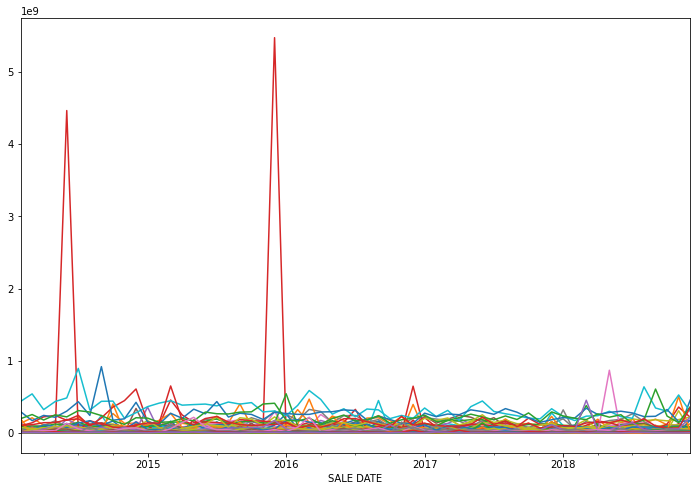

In [27]:
# Now going to do some time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

# Let's plot the data
df_time.plot(figsize=(12,8))

# Removing the legend
plt.legend().remove()

plt.show()

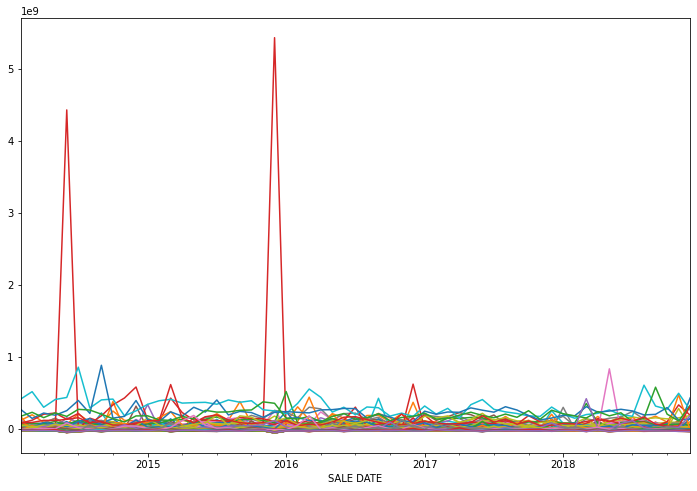

In [28]:
# Doing the same for the detrended data
detrend_data.plot(figsize=(12,8))
plt.legend().remove()
plt.show()

In [36]:
df_time.shape

(59, 255)

In [30]:
# Going to perform Seasonal Decomposition
neighborhood = 'MANHATTAN BEACH'
result = seasonal_decompose(df_time[neighborhood], model='additive',two_sided=False)

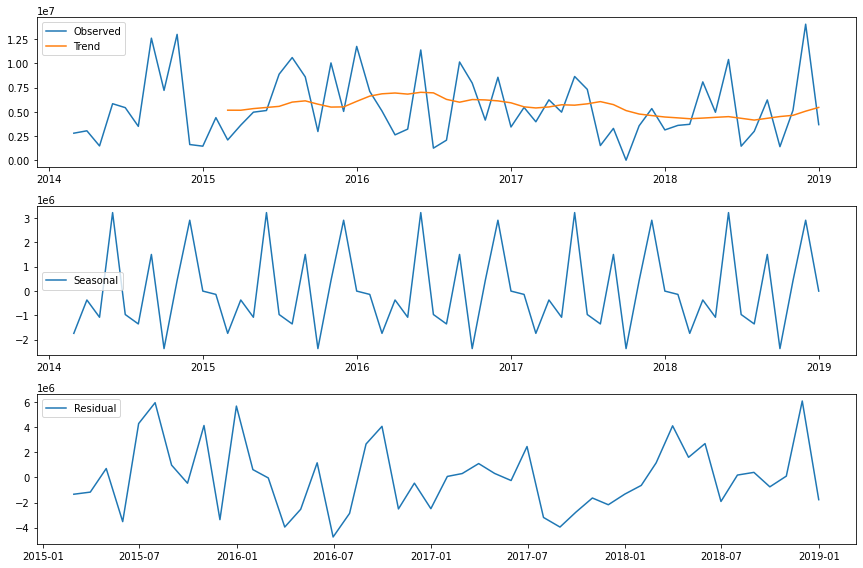

In [31]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

fig, ax = plt.subplots(nrows=3, figsize=(12, 8))
ax[0].plot(df_time['MANHATTAN BEACH'], label='Observed')
ax[0].plot(trend, label='Trend')
ax[0].legend()
ax[1].plot(seasonal, label='Seasonal')
ax[1].legend()
ax[2].plot(residual, label='Residual')
ax[2].legend()
plt.tight_layout()
plt.show()

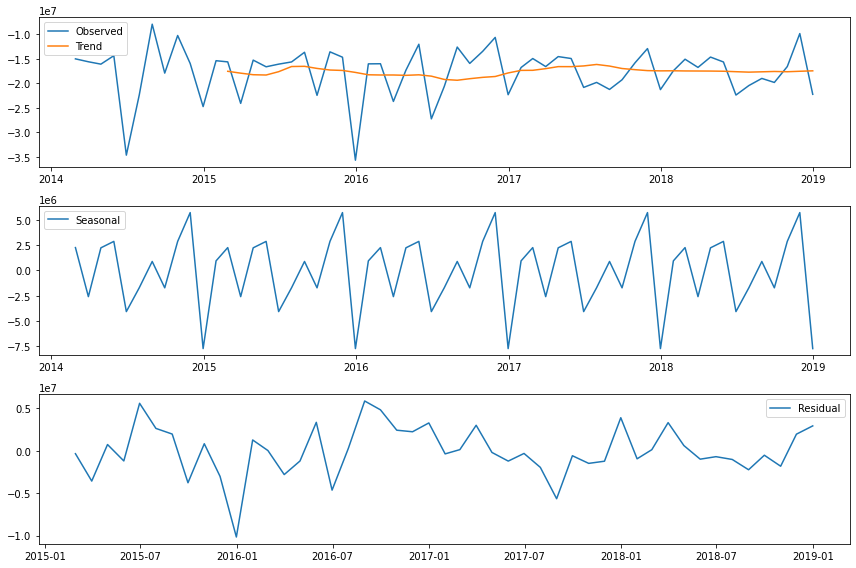

In [32]:
# Doing the same for the detrended data
neighborhood = 'MANHATTAN BEACH'
result = seasonal_decompose(detrend_data[neighborhood], model='additive',two_sided=False)

trend = result.trend
seasonal = result.seasonal
residual = result.resid

fig, ax = plt.subplots(nrows=3, figsize=(12, 8))
ax[0].plot(detrend_data['MANHATTAN BEACH'], label='Observed')
ax[0].plot(trend, label='Trend')
ax[0].legend()
ax[1].plot(seasonal, label='Seasonal')
ax[1].legend()
ax[2].plot(residual, label='Residual')
ax[2].legend()
plt.tight_layout()
plt.show()


In [33]:
''' Now i'm going to iterate through all the neighborhoods and perform the seasonal decomposition on each one and store the results in a dictionary
 to prepare for similiarity analysis'''

# Creating a dictionary to store the results of the seasonal decomposition
decomposition_results = {}
results = {}

# Iterate through each neighborhood and perform a seasonal decomposition analysis
for col in df_time.columns:
    neighborhood = df_time[col]
    
    # Interpolate missing values in the time series
    #neighborhood = neighborhood.interpolate(method='linear')
    
    # Perform a seasonal decomposition analysis
    result = seasonal_decompose(neighborhood, model='additive', period=12, two_sided=False)
    decomposition_results[col] = {'trend': result.trend, 'seasonal': result.seasonal, 'residual': result.resid}
    

In [34]:
# Now doing the same for the detrended data
detrend_decomposition_results = {}
detrend_results = {}

for col in detrend_data.columns:
    neighborhood = detrend_data[col]
    
    # Interpolate missing values in the time series
    #neighborhood = neighborhood.interpolate(method='linear')
    
    # Perform a seasonal decomposition analysis
    result = seasonal_decompose(neighborhood, model='additive', period=12, two_sided=False)
    detrend_decomposition_results[col] = {'trend': result.trend, 'seasonal': result.seasonal, 'residual': result.resid}

In [65]:
decomposition_results

{'AIRPORT LA GUARDIA': {'trend': SALE DATE
  2014-02-28              NaN
  2014-03-31              NaN
  2014-04-30              NaN
  2014-05-31              NaN
  2014-06-30              NaN
  2014-07-31              NaN
  2014-08-31              NaN
  2014-09-30              NaN
  2014-10-31              NaN
  2014-11-30              NaN
  2014-12-31              NaN
  2015-01-31              NaN
  2015-02-28     55333.333333
  2015-03-31     55333.333333
  2015-04-30     81166.666667
  2015-05-31     79333.333333
  2015-06-30     51666.666667
  2015-07-31     51666.666667
  2015-08-31     51666.666667
  2015-09-30     51666.666667
  2015-10-31     77500.000000
  2015-11-30    103333.333333
  2015-12-31    103333.333333
  2016-01-31    103333.333333
  2016-02-29    103333.333333
  2016-03-31    103333.333333
  2016-04-30    136250.000000
  2016-05-31    169166.666667
  2016-06-30    169166.666667
  2016-07-31    196666.666667
  2016-08-31    224166.666667
  2016-09-30    224166.6666

## Correlation of average Trend, Seasonality, and Residual for each Neighborhood

Each row in the corr_matrix DataFrame represents a neighborhood, and each column represents a component (Trend, Seasonal, or Residual). The values in each cell of the DataFrame represent the correlation coefficient between the corresponding component for the row neighborhood and the overall average of that component across all neighborhoods.

For example, if the value in the cell at row neighborhood_A and column Trend is 0.8, this means that the trend component of neighborhood_A is highly correlated with the average trend component across all neighborhoods.

To interpret the correlation matrix, you can look for neighborhoods that have high positive or negative correlations in each component. For example, if two neighborhoods have a high positive correlation in the Trend component, this means that they have similar trends over time. Similarly, if two neighborhoods have a high negative correlation in the Seasonal component, this means that they have opposite seasonal patterns over time.

By examining the correlation matrix, you can identify which neighborhoods have similar or different patterns in each component, and use this information to group neighborhoods together or identify outliers.

In [35]:
# Preparing a correlation matrix
corr_matrix = pd.DataFrame(index=df_time.columns, columns=['Trend', 'Seasonal', 'Residual'])

# Calculating the correlation between the trend, seasonal, and residual
for i, neighborhood in enumerate(df_time.columns):
    for j, component in enumerate(['trend', 'seasonal', 'residual']):
        corr = df_time[neighborhood].corr(decomposition_results[neighborhood][component])
        corr_matrix.iloc[i, j] = corr

corr_matrix



Trend  Seasonal  Residual
NEIGHBORHOOD                                    
AIRPORT LA GUARDIA  0.102692  0.536766  0.708847
ALPHABET CITY       0.106279  0.322411  0.861883
ANNADALE            0.207739  0.224523  0.886398
ARDEN HEIGHTS       0.595724  0.421198  0.579552
ARROCHAR            0.229683   0.30673  0.837121
...                      ...       ...       ...
WOODHAVEN           0.320949   0.46736  0.685101
WOODLAWN            0.124387  0.413348  0.804493
WOODROW             0.720282  0.301818  0.674121
WOODSIDE             0.13347  0.328362  0.850599
WYCKOFF HEIGHTS     0.258131  0.294833  0.856782

[255 rows x 3 columns]

In [36]:
# Doing the same for the detrended data
detrend_corr_matrix = pd.DataFrame(index=detrend_data.columns, columns=['Trend', 'Seasonal', 'Residual'])

for i, neighborhood in enumerate(detrend_data.columns):
    for j, component in enumerate(['trend', 'seasonal', 'residual']):
        corr = detrend_data[neighborhood].corr(detrend_decomposition_results[neighborhood][component])
        detrend_corr_matrix.iloc[i, j] = corr

detrend_corr_matrix

Trend  Seasonal  Residual
NEIGHBORHOOD                                    
AIRPORT LA GUARDIA  0.258738  0.534039  0.783979
ALPHABET CITY       0.108905  0.324953  0.853016
ANNADALE            0.303187  0.403773  0.852301
ARDEN HEIGHTS        0.51119  0.317019   0.78696
ARROCHAR            0.198276  0.536836  0.798223
...                      ...       ...       ...
WOODHAVEN           0.304039  0.509515  0.620391
WOODLAWN            0.161659  0.605632  0.661649
WOODROW             0.375255  0.550352  0.635315
WOODSIDE             0.21777  0.402264  0.807026
WYCKOFF HEIGHTS     0.030819  0.618729  0.704273

[255 rows x 3 columns]

## Correlation matrix between Trend, Seasonality, and Residual for each Neighborhood
 The values in each cell of the DataFrame represent the correlation coefficient between the trend component of the row neighborhood and the trend component of the column neighborhood.

By examining the trend correlation matrix, you can identify which neighborhoods have similar or dissimilar trends over time. Neighborhoods with high positive correlations in the trend component are likely to have similar trends over time, while neighborhoods with high negative correlations in the trend component may have opposite trends over time.

You can use this information to group neighborhoods together or identify outliers, as before.


In [154]:
# Preparing a correlation matrix for trend only
trend_corr_matrix = pd.DataFrame(index=df_time.columns, columns=df_time.columns)

# Calculating the correlation between the trend component for each neighborhood and all other neighborhoods
for i, neighborhood1 in enumerate(df_time.columns):
    for j, neighborhood2 in enumerate(df_time.columns):
        corr = decomposition_results[neighborhood1]['trend'].corr(decomposition_results[neighborhood2]['trend'])
        trend_corr_matrix.iloc[i, j] = corr

trend_corr_matrix

NEIGHBORHOOD       AIRPORT LA GUARDIA ALPHABET CITY  ANNADALE ARDEN HEIGHTS  \
NEIGHBORHOOD                                                                  
AIRPORT LA GUARDIA                1.0     -0.764117  0.166974      0.577591   
ALPHABET CITY               -0.764117           1.0 -0.037307     -0.610581   
ANNADALE                     0.166974     -0.037307       1.0      0.341158   
ARDEN HEIGHTS                0.577591     -0.610581  0.341158           1.0   
ARROCHAR                     0.743248      -0.41927  0.086026       0.09478   
...                               ...           ...       ...           ...   
WOODHAVEN                    0.677676     -0.566469  0.613164      0.880877   
WOODLAWN                     0.477481      -0.19529  0.586529      0.199595   
WOODROW                      0.327001     -0.390529  0.541776      0.922012   
WOODSIDE                     0.764773     -0.571972 -0.031748      0.620942   
WYCKOFF HEIGHTS              -0.60517       0.51223 -0.485562     -0.837585   

NEIGHBORHOOD        ARROCHAR ARROCHAR-SHORE ACRES   ARVERNE   ASTORIA  \
NEIGHBORHOOD                                                            
AIRPORT LA GUARDIA  0.743248            -0.364662  -0.58247  0.184685   
ALPHABET CITY       -0.41927             0.416649  0.451566 -0.081769   
ANNADALE            0.086026             0.480563  0.198382 -0.295343   
ARDEN HEIGHTS        0.09478             -0.11571 -0.563896  0.477407   
ARROCHAR                 1.0            -0.118501 -0.411921  0.121892   
...                      ...                  ...       ...       ...   
WOODHAVEN           0.346833             0.023633 -0.382347  0.261186   
WOODLAWN            0.676347             0.293208 -0.272164 -0.118335   
WOODROW            -0.147676             0.147345 -0.356675  0.363851   
WOODSIDE            0.670939            -0.192628 -0.854195  0.549001   
WYCKOFF HEIGHTS    -0.199224             0.021244  0.580239 -0.381149   

NEIGHBORHOOD       BATH BEACH  BATHGATE  ... WILLIAMSBURG-EAST  \
NEIGHBORHOOD                             ...                     
AIRPORT LA GUARDIA  -0.514966 -0.467279  ...           -0.4286   
ALPHABET CITY         0.55486  0.386964  ...          0.545703   
ANNADALE             0.382893  0.223791  ...         -0.061997   
ARDEN HEIGHTS       -0.593388  0.182088  ...         -0.911493   
ARROCHAR            -0.222476 -0.659969  ...          0.100218   
...                       ...       ...  ...               ...   
WOODHAVEN           -0.340989  0.030664  ...          -0.68645   
WOODLAWN            -0.033226 -0.352524  ...          0.060013   
WOODROW             -0.340908  0.430249  ...         -0.802016   
WOODSIDE            -0.736486 -0.390354  ...         -0.490297   
WYCKOFF HEIGHTS      0.497488  -0.06241  ...          0.641763   

NEIGHBORHOOD       WILLIAMSBURG-NORTH WILLIAMSBURG-SOUTH WILLOWBROOK  \
NEIGHBORHOOD                                                           
AIRPORT LA GUARDIA          -0.621477           0.683729    0.658369   
ALPHABET CITY                 0.54623          -0.351026   -0.577601   
ANNADALE                    -0.311019           0.268454     0.74237   
ARDEN HEIGHTS                -0.87517           0.438328    0.739732   
ARROCHAR                    -0.221595           0.793612    0.400029   
...                               ...                ...         ...   
WOODHAVEN                   -0.773124           0.614897    0.939124   
WOODLAWN                    -0.284075           0.791298    0.640299   
WOODROW                     -0.810543           0.271078    0.734577   
WOODSIDE                    -0.704111           0.844777    0.462825   
WYCKOFF HEIGHTS              0.873516          -0.551695   -0.797752   

NEIGHBORHOOD       WINDSOR TERRACE WOODHAVEN  WOODLAWN   WOODROW  WOODSIDE  \
NEIGHBORHOOD                                                                 
AIRPORT LA GUARDIA        0.422029  0.677676  0.477481  0.327001  0.76

In [70]:
# Preparing a correlation matrix for trend only
season_corr_matrix = pd.DataFrame(index=df_time.columns, columns=df_time.columns)

# Calculating the correlation between the trend component for each neighborhood and all other neighborhoods
for i, neighborhood1 in enumerate(df_time.columns):
    for j, neighborhood2 in enumerate(df_time.columns):
        corr = decomposition_results[neighborhood1]['seasonal'].corr(decomposition_results[neighborhood2]['seasonal'])
        season_corr_matrix.iloc[i, j] = corr

season_corr_matrix

NEIGHBORHOOD       AIRPORT LA GUARDIA ALPHABET CITY  ANNADALE ARDEN HEIGHTS  \
NEIGHBORHOOD                                                                  
AIRPORT LA GUARDIA                1.0      0.255691 -0.077692     -0.134082   
ALPHABET CITY                0.255691           1.0  0.333862     -0.245674   
ANNADALE                    -0.077692      0.333862       1.0      0.457987   
ARDEN HEIGHTS               -0.134082     -0.245674  0.457987           1.0   
ARROCHAR                    -0.237247     -0.165348   0.15057      0.385212   
...                               ...           ...       ...           ...   
WOODHAVEN                    0.128797     -0.447871  0.269748      0.251727   
WOODLAWN                     0.036898     -0.173282  0.120625       0.49787   
WOODROW                     -0.274844     -0.120806  0.555619      0.396135   
WOODSIDE                     0.423192     -0.052609 -0.044549      0.169447   
WYCKOFF HEIGHTS              0.255473     -0.337384 -0.378984     -0.339623   

NEIGHBORHOOD        ARROCHAR ARROCHAR-SHORE ACRES   ARVERNE   ASTORIA  \
NEIGHBORHOOD                                                            
AIRPORT LA GUARDIA -0.237247            -0.083871   0.15568  0.336524   
ALPHABET CITY      -0.165348            -0.012989 -0.037122  0.144705   
ANNADALE             0.15057            -0.495975 -0.016847 -0.145977   
ARDEN HEIGHTS       0.385212            -0.061638  0.081749  0.347235   
ARROCHAR                 1.0             0.021635  0.478871 -0.066333   
...                      ...                  ...       ...       ...   
WOODHAVEN           0.104953            -0.304956  0.357855 -0.340907   
WOODLAWN           -0.319418              0.05476 -0.159829  0.007363   
WOODROW             0.621709            -0.371484  0.377997 -0.423327   
WOODSIDE           -0.203066            -0.262949 -0.093236  0.213375   
WYCKOFF HEIGHTS      0.28234            -0.178419  0.590907  0.026389   

NEIGHBORHOOD       BATH BEACH  BATHGATE  ... WILLIAMSBURG-EAST  \
NEIGHBORHOOD                             ...                     
AIRPORT LA GUARDIA  -0.338053  0.228292  ...          0.160959   
ALPHABET CITY        0.658275  0.404513  ...         -0.154894   
ANNADALE             0.457725 -0.215503  ...          0.149662   
ARDEN HEIGHTS        0.107233 -0.614395  ...          0.531852   
ARROCHAR            -0.123858 -0.160728  ...          0.350865   
...                       ...       ...  ...               ...   
WOODHAVEN           -0.337945  0.092458  ...          0.593256   
WOODLAWN             -0.04463 -0.428697  ...          0.133597   
WOODROW              0.076307 -0.051172  ...          0.158982   
WOODSIDE            -0.221768 -0.187199  ...         -0.328312   
WYCKOFF HEIGHTS     -0.514634  0.269435  ...         -0.023668   

NEIGHBORHOOD       WILLIAMSBURG-NORTH WILLIAMSBURG-SOUTH WILLOWBROOK  \
NEIGHBORHOOD                                                           
AIRPORT LA GUARDIA          -0.031503          -0.182434     0.15514   
ALPHABET CITY                0.314267          -0.309292    0.057558   
ANNADALE                    -0.328414           0.115279    0.690077   
ARDEN HEIGHTS               -0.190826           0.114308    0.808791   
ARROCHAR                     0.440176           0.184131    0.178218   
...                               ...                ...         ...   
WOODHAVEN                   -0.285732          -0.044073    0.389581   
WOODLAWN                     -0.40539          -0.432171    0.281203   
WOODROW                      0.156543           0.160869    0.379718   
WOODSIDE                    -0.083522           0.004358    0.117782   
WYCKOFF HEIGHTS              0.360316           0.481815   -0.295828   

NEIGHBORHOOD       WINDSOR TERRACE WOODHAVEN  WOODLAWN   WOODROW  WOODSIDE  \
NEIGHBORHOOD                                                                 
AIRPORT LA GUARDIA       -0.295804  0.128797  0.036898 -0.274844  0.42

In [58]:
decomposition_results

{'AIRPORT LA GUARDIA': {'trend': SALE DATE
  2014-02-28              NaN
  2014-03-31              NaN
  2014-04-30              NaN
  2014-05-31              NaN
  2014-06-30              NaN
  2014-07-31              NaN
  2014-08-31              NaN
  2014-09-30              NaN
  2014-10-31              NaN
  2014-11-30              NaN
  2014-12-31              NaN
  2015-01-31              NaN
  2015-02-28     55333.333333
  2015-03-31     55333.333333
  2015-04-30     81166.666667
  2015-05-31     79333.333333
  2015-06-30     51666.666667
  2015-07-31     51666.666667
  2015-08-31     51666.666667
  2015-09-30     51666.666667
  2015-10-31     77500.000000
  2015-11-30    103333.333333
  2015-12-31    103333.333333
  2016-01-31    103333.333333
  2016-02-29    103333.333333
  2016-03-31    103333.333333
  2016-04-30    136250.000000
  2016-05-31    169166.666667
  2016-06-30    169166.666667
  2016-07-31    196666.666667
  2016-08-31    224166.666667
  2016-09-30    224166.6666

In [107]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Create an empty dictionary to store the results for each neighborhood
decomposition_results = {}

# Perform a seasonal decomposition analysis for each neighborhood and store the results in the dictionary
for col in df_time.columns:
    neighborhood = df_time[col]
    result = seasonal_decompose(neighborhood, model='additive', period=12, two_sided=False)
    decomposition_results[col] = {'trend': result.trend, 'seasonal': result.seasonal, 'residual': result.resid}

# Extract the trend, seasonal, and residual components as a matrix and flatten into a 1-dimensional array
X = np.concatenate([np.concatenate([decomposition_results[col]['trend'], decomposition_results[col]['seasonal'], decomposition_results[col]['residual']]).reshape(1, -1) for col in df_time.columns])
# Replace NaN values with 0
X = np.nan_to_num(X, nan=0)

# Apply K-means clustering to group neighborhoods
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
labels = kmeans.labels_

# Create a dataframe to store the results
cluster_results = pd.DataFrame(index=df_time.columns, columns=['Cluster', 'Trend', 'Seasonal', 'Residual'])

# Store the results in the dataframe
for i, neighborhood in enumerate(df_time.columns):
    cluster_results.iloc[i, 0] = labels[i]
    cluster_results.iloc[i, 1] = decomposition_results[neighborhood]['trend'].mean()
    cluster_results.iloc[i, 2] = decomposition_results[neighborhood]['seasonal'].mean()
    cluster_results.iloc[i, 3] = decomposition_results[neighborhood]['residual'].mean()

cluster_results




Cluster            Trend       Seasonal       Residual
NEIGHBORHOOD                                                             
AIRPORT LA GUARDIA       2    230054.734043    2667.948839   16255.925926
ALPHABET CITY            0  23770145.031028  141494.240069 -100513.502604
ANNADALE                 2   7200150.593085   37336.810072  404985.794271
ARDEN HEIGHTS            2   7431377.500887   22894.832009  601040.880208
ARROCHAR                 2   1161546.784574    7220.125868  -47321.240451
...                    ...              ...            ...            ...
WOODHAVEN                2  13330494.879433   33192.005856  656394.262153
WOODLAWN                 2   2466984.548759    8694.332406    1872.778646
WOODROW                  2    4648870.29344   25862.424739  665232.045718
WOODSIDE                 2  12508308.923759   40322.683145   19114.388889
WYCKOFF HEIGHTS          2   5964537.330674    24028.42599 -170391.588831

[255 rows x 4 columns]

### Heatmap of Average Trend for each cluster

The heatmap shows the average values of the trend, seasonal, and residual variables for each cluster. The rows represent the different clusters, and the columns represent the different variables. The colors represent the average value of each variable for each cluster, with red indicating a high value and blue indicating a low value. You can use this plot to get a sense of how the different clusters differ from each other in terms of their average values for each variable.

If you see cluster 1 & trend in red (high value) on the heatmap, it means that the average value of the trend variable is relatively high for the neighborhoods in cluster 1. In other words, the neighborhoods in cluster 1 tend to have higher trend values compared to the other clusters.

This information can be useful if you want to understand the characteristics of the different clusters and how they differ from each other. For example, if you were analyzing housing prices, you might interpret a cluster with a high trend value to mean that the housing prices in those neighborhoods tend to be increasing over time. However, it's important to keep in mind that the interpretation of the heatmap will depend on the specific context and the variables that are being analyzed.


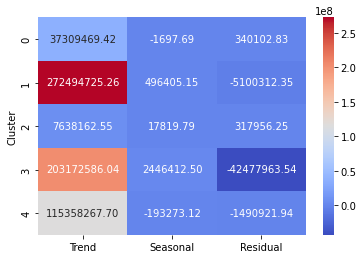

In [88]:
import seaborn as sns

# Calculate the average values of the trend, seasonal, and residual variables for each cluster
cluster_means = cluster_results.groupby('Cluster').mean()

# Create a heatmap of the average values, with different colors for different clusters
sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

## Parallel Coordinates Plot

he parallel coordinates plot shows how the trend, seasonal, and residual variables vary for each cluster. Each line represents a cluster, and the vertical axis shows the value of each variable. The lines are connected by a series of parallel lines, one for each variable. You can use this plot to compare the different clusters and see how they differ in terms of their trend, seasonal, and residual patterns.



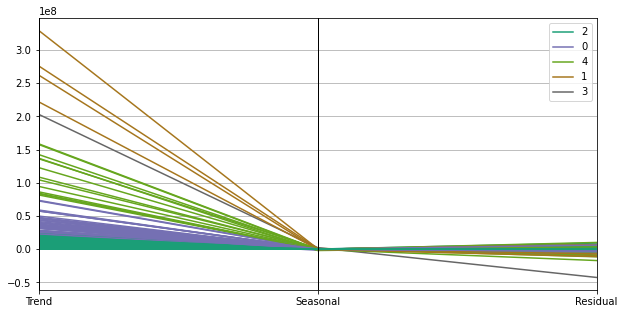

In [89]:
from pandas.plotting import parallel_coordinates

# Add the cluster labels to the cluster_results dataframe
cluster_results['Cluster'] = labels

# Create a parallel coordinates plot of the trend, seasonal, and residual variables, with different colors for different clusters
plt.figure(figsize=(10,5))
parallel_coordinates(cluster_results, 'Cluster', colormap='Dark2')
plt.show()

## PCA of Trend, Seasonality, and Residual for each Neighborhood

The scatter plot shows the neighborhoods plotted in two dimensions, with each dot representing a neighborhood. The x and y axes correspond to the first and second principal components, respectively. The different colors represent the different clusters that the neighborhoods belong to. You can use this plot to get a sense of how well the K-means algorithm has separated the neighborhoods into distinct groups.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

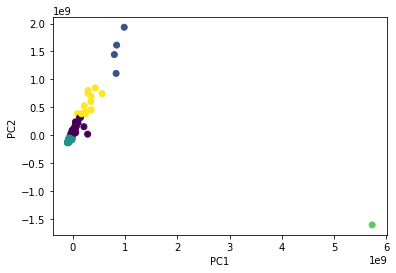

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality of the data to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the neighborhoods, with different colors for different clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels) 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [108]:
# Now let' do this ussing plotly
import plotly.graph_objects as go

# Create a list of colors for each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'grey', 'black']

# Create a list of traces for each cluster
traces = []
for i in range(5):
    traces.append(go.Scatter(x=cluster_results[cluster_results['Cluster'] == i].index, y=cluster_results[cluster_results['Cluster'] == i]['Trend'], name='Cluster {}'.format(i), line=dict(color=colors[i])))

# Create a layout object
layout = go.Layout(title='Trend Component by Cluster', xaxis=dict(title='Neighborhood'), yaxis=dict(title='Trend'))

# Create a figure object
fig = go.Figure(data=traces, layout=layout)

# Plot the figure
fig.show()

In [94]:
df_time

NEIGHBORHOOD  AIRPORT LA GUARDIA  ALPHABET CITY    ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                    
2014-02-28                   0.0      9284500.0   2604691.0      5214111.0   
2014-03-31                   0.0     20482175.0   7863038.0      5608208.0   
2014-04-30                   0.0      6639000.0   7308596.0      4516096.0   
2014-05-31              664000.0     10543500.0   7307786.0      5579960.0   
2014-06-30                   0.0      4560000.0   5277000.0      6905962.0   
2014-07-31                   0.0     37230500.0  13136707.0      4661719.0   
2014-08-31                   0.0     19348000.0   4495281.0      4962940.0   
2014-09-30                   0.0     21790000.0   2725000.0      4544650.0   
2014-10-31                   0.0     14969013.0   6375438.0      4516937.0   
2014-11-30                   0.0     45098501.0   3081505.0      3137500.0   
2014-12-31                   0.0    115552000.0   8286778.0      4771785.0   
2015-01-31                   0.0      8997972.0   4274332.0      6947696.0   
2015-02-28                   0.0     16660000.0   9492273.0      4047332.0   
2015-03-31                   0.0     29699918.0   2490969.0      5464484.0   
2015-04-30              620000.0     10636461.0   6373654.0      3298910.0   
2015-05-31                   0.0     13374501.0   5385278.0      8168768.0   
2015-06-30                   0.0     23047430.0   3572900.0      7536926.0   
2015-07-31                   0.0     22691018.0   6125203.0      6371500.0   
2015-08-31                   0.0     22221700.0   9407625.0      6635970.0   
2015-09-30                   0.0     44298222.0   7177800.0      5251500.0   
2015-10-31              620000.0     22902500.0  10106069.0      8067855.0   
2015-11-30                   0.0     40258050.0   7415242.0      5528069.0   
2015-12-31                   0.0     16485017.0  10038150.0      5960799.0   
2016-01-31                   0.0      7064854.0   3615000.0      7609178.0   
2016-02-29                   0.0      3370000.0  13017122.0      5455991.0   
2016-03-31                   0.0      5260000.0   2977366.0      4895085.0   
2016-04-30             1410000.0     21269423.0   9457782.0      4212401.0   
2016-05-31                   0.0    108195512.0   7932363.0      2362317.0   
2016-06-30                   0.0     25424322.0   7433352.0     11869121.0   
2016-07-31              660000.0     12086063.0   9454364.0      4636000.0   
2016-08-31                   0.0     15445010.0  12515653.0      9828511.0   
2016-09-30                   0.0     16444392.0  11113024.0      7179359.0   
2016-10-31                   0.0     40303499.0   7721900.0      5863864.0   
2016-11-30              604500.0     35299255.0   8898637.0      9997899.0   
2016-12-31                   0.0     10938700.0   4070010.0     11115480.0   
2017-01-31              425000.0     22729911.0   4325258.0      7528510.0   
2017-02-28                   0.0      8395681.0   2458568.0      7002899.0   
2017-03-31                   0.0      7765000.0   9392817.0      7484192.0   
2017-04-30             1200000.0     17529585.0   2603920.0      7051816.0   
2017-05-31             1400000.0     14852737.0  10052308.0     10852614.0   
2017-06-30              750010.0     32477500.0  10321514.0     10872565.0   
2017-07-31             1762000.0     21637000.0   5188275.0      6166837.0   
2017-08-31              730000.0     12204500.0   7809965.0     13814823.0   
2017-09-30                   0.0      8265561.0  11066058.0      8619570.0   
2017-10-31                   0.0      2409974.0   4696000.0     11566880.0   
2017-11-30                   0.0     13192000.0   4462500.0      9851061.0   
2017-12-31                   0.0      9830650.0   7283674.0     13050564.0   
2018-01-31                   0.0      6737000.0   8485458.0      5221747.0   
2018-02-28                   0.0     15562020.0   4519000.0      7982682.0   
2018-03-31            

In [93]:
from itertools import groupby
df_time.columns = pd.to_datetime(df_time.columns)
# Group neighborhoods by cluster label
neighborhood_clusters = {k: [g for _, g in groupby(df_time[k], lambda x: x.year)] for k in df_time}

# Fit ARIMA models to the trend component of each cluster
cluster_models = {}
for cluster_label in set(cluster_results['Cluster']):
    cluster_neighborhoods = [k for k in df_time if cluster_results.loc[k, 'Cluster'] == cluster_label]
    cluster_trends = [decomposition_results[k]['trend'] for k in cluster_neighborhoods]
    cluster_trends = pd.concat(cluster_trends, axis=1)
    cluster_trends_mean = cluster_trends.mean(axis=1)
    model = auto_arima(cluster_trends_mean, seasonal=True, m=12, suppress_warnings=True)
    cluster_models[cluster_label] = model

# Make predictions for each neighborhood in each cluster
cluster_predictions = {}
for cluster_label in cluster_models:
    model = cluster_models[cluster_label]
    cluster_neighborhoods = [k for k in df_time if cluster_results.loc[k, 'Cluster'] == cluster_label]
    for neighborhood in cluster_neighborhoods:
        trend = decomposition_results[neighborhood]['trend']
        trend_mean = trend.mean()
        trend_prediction = model.predict(n_periods=12)
        neighborhood_prediction = trend_prediction + trend_mean
        if neighborhood not in cluster_predictions:
            cluster_predictions[neighborhood] = neighborhood_prediction
        else:
            cluster_predictions[neighborhood] = pd.concat([cluster_predictions[neighborhood], neighborhood_prediction])

# Plot the original and predicted trend for each neighborhood in each cluster
for cluster_label in cluster_models:
    cluster_neighborhoods = [k for k in df_time if cluster_results.loc[k, 'Cluster'] == cluster_label]
    fig, ax = plt.subplots(figsize=(10, 5))
    for neighborhood in cluster_neighborhoods:
        trend = decomposition_results[neighborhood]['trend']
        trend_prediction = cluster_predictions[neighborhood]
        ax.plot(trend.index, trend, label=neighborhood)
        ax.plot(trend_prediction.index, trend_prediction, label=neighborhood + ' (predicted)')
    ax.legend()
    ax.set_title('Trend for Cluster ' + str(cluster_label))
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

ParserError: Unknown string format: AIRPORT LA GUARDIA

In [91]:
X_pca

array([[-9.74486788e+07, -1.27284875e+08],
       [-2.83337365e+07,  2.44578212e+07],
       [-7.30339599e+07, -8.65947947e+07],
       [-7.63557074e+07, -8.45923437e+07],
       [-9.38357909e+07, -1.22027814e+08],
       [-9.56317312e+07, -1.24174061e+08],
       [-7.73663811e+07, -9.17786708e+07],
       [ 4.26428148e+07,  1.77121920e+08],
       [-5.17390952e+07, -5.11192169e+07],
       [-9.15648888e+07, -1.09104356e+08],
       [ 2.58296069e+07,  1.10517263e+08],
       [-6.66779671e+07, -7.33515896e+07],
       [ 4.34761002e+07,  1.29547523e+08],
       [-4.41035041e+07, -3.36967308e+07],
       [ 1.70423026e+08,  3.80473635e+08],
       [-7.82987984e+07, -8.79430910e+07],
       [-8.07703696e+07, -9.99568956e+07],
       [-7.60737865e+07, -9.02897005e+07],
       [-7.84733549e+07, -8.89843282e+07],
       [-3.61265422e+07,  1.81879569e+07],
       [-7.31464899e+07, -8.67076427e+07],
       [-9.78064062e+07, -1.28709310e+08],
       [-4.24134294e+07,  1.89176123e+07],
       [ 4.

In [59]:
X = np.array([pd.concat([decomposition_results[col]['trend'], decomposition_results[col]['seasonal'], decomposition_results[col]['residual']], axis=1).values for col in df_time.columns])
X

array([[[            nan, -2.42204051e+05,             nan],
        [            nan, -2.42204051e+05,             nan],
        [            nan,  5.65295949e+05,             nan],
        ...,
        [ 6.08333333e+04, -8.85790509e+04,  2.77457176e+04],
        [ 9.51041667e+04,  1.04603241e+05,  6.22792593e+05],
        [ 1.29375000e+05, -2.60714468e+05,  1.31339468e+05]],

       [[            nan, -1.09658293e+07,             nan],
        [            nan, -5.89592995e+06,             nan],
        [            nan,  1.50048057e+07,             nan],
        ...,
        [ 2.77490980e+07, -7.56365802e+06, -1.47447270e+07],
        [ 2.87717538e+07,  5.74326549e+06,  1.89980674e+05],
        [ 3.09238517e+07, -4.91912004e+06,  1.39632683e+07]],

       [[            nan, -6.72316589e+04,             nan],
        [            nan, -1.52554029e+06,             nan],
        [            nan, -6.91273086e+05,             nan],
        ...,
        [ 7.40959500e+06, -1.67591315e+05,

In [61]:
'''Cluster Analysis'''
from sklearn.cluster import KMeans
import numpy as np

# Extract the trend, seasonal, and residual components as a matrix
X = np.array([pd.concat([decomposition_results[col]['trend'], decomposition_results[col]['seasonal'], decomposition_results[col]['residual']], axis=1).values for col in df_time.columns])
# Dropping NaN values
X = X[~np.isnan(X).any(axis=1)]

# Reshape the X matrix to a 2D array
X_2d = X.reshape(X.shape[0], -1)

# Apply K-means clustering to group neighborhoods
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_2d)
labels = kmeans.labels_

# Create a dataframe to store the results
cluster_results = pd.DataFrame(index=df_time.columns, columns=['Cluster', 'Trend', 'Seasonal', 'Residual'])

# Store the results in the dataframe
for i, neighborhood in enumerate(df_time.columns):
    cluster_results.iloc[i, 0] = labels[i]
    cluster_results.iloc[i, 1] = decomposition_results[neighborhood]['trend'].mean()
    cluster_results.iloc[i, 2] = decomposition_results[neighborhood]['seasonal'].mean()
    cluster_results.iloc[i, 3] = decomposition_results[neighborhood]['residual'].mean()

cluster_results

IndexError: boolean index did not match indexed array along dimension 1; dimension is 59 but corresponding boolean dimension is 3

## Next, we will try and find similarties between the trends of the different neighborhoods


Stationarity is a property of a time series data set that indicates that the statistical properties of the data set do not change over time. In other words, if a time series is stationary, its mean, variance, and autocovariance are constant over time.

Stationarity is an important property for time series analysis because many statistical models and techniques, such as ARIMA models and exponential smoothing, assume that the time series data is stationary. If a time series is not stationary, it may need to be transformed or differenced before it can be analyzed.

There are several tests that can be used to determine if a time series is stationary, such as the Augmented Dickey-Fuller test (ADF) and the Kwiatkowski-Phillips-Schmidt-Shin test (KPSS). These tests compare the statistical properties of the time series data at different points in time and determine if they are consistent over time.

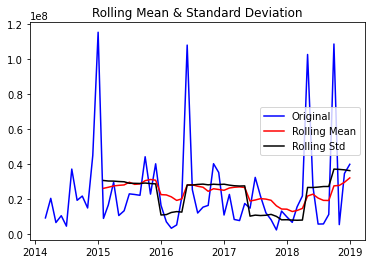

Results of Dickey-Fuller Test:
Test Statistic                -7.260713e+00
p-value                        1.684433e-10
#Lags Used                     0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


In [18]:
''' Creating a function to test for stationarity of the data'''

# Dropping the first row of data since it is NaN
df_time.dropna(inplace=True)

def test_stationarity(timeseries):
        
        #Determing rolling statistics
        rolmean = timeseries.rolling(window=12, center=False).mean()
        rolstd = timeseries.rolling(window=12, center=False).std()
    
        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        #Perform Dickey-Fuller test:
        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput)

# Testing for stationarity
test_stationarity(df_time['ALPHABET CITY'])

In [174]:
''' Creating a function that takes in the dataframe with has the neighborhood as the columns and the index as the date and returns a new
dataframe with the trend component of each neighborhood'''

def trend_component(df):
    trend_df = pd.DataFrame()
    for i in df.columns:
        result = seasonal_decompose(df[i], model='additive')
        trend_df[i] = result.trend
    return trend_df

# Getting the trend component of each neighborhood
trend_df = trend_component(df_time)
trend_df.head()

/var/folders/w_/6hq13d5j2kvcn5sylq3jc1tc0000gn/T/ipykernel_34385/4208907483.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trend_df[i] = result.trend
/var/folders/w_/6hq13d5j2kvcn5sylq3jc1tc0000gn/T/ipykernel_34385/4208907483.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trend_df[i] = result.trend
/var/folders/w_/6hq13d5j2kvcn5sylq3jc1tc0000gn/T/ipykernel_34385/4208907483.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

AIRPORT LA GUARDIA  ALPHABET CITY  ANNADALE  ARDEN HEIGHTS  \
SALE DATE                                                                
2014-02-28                 NaN            NaN       NaN            NaN   
2014-03-31                 NaN            NaN       NaN            NaN   
2014-04-30                 NaN            NaN       NaN            NaN   
2014-05-31                 NaN            NaN       NaN            NaN   
2014-06-30                 NaN            NaN       NaN            NaN   

            ARROCHAR  ARROCHAR-SHORE ACRES  ARVERNE  ASTORIA  BATH BEACH  \
SALE DATE                                                                  
2014-02-28       NaN                   NaN      NaN      NaN         NaN   
2014-03-31       NaN                   NaN      NaN      NaN         NaN   
2014-04-30       NaN                   NaN      NaN      NaN         NaN   
2014-05-31       NaN                   NaN      NaN      NaN         NaN   
2014-06-30       NaN                   NaN      NaN      NaN         NaN   

            BATHGATE  ...  WILLIAMSBURG-EAST  WILLIAMSBURG-NORTH  \
SALE DATE             ...                                          
2014-02-28       NaN  ...                NaN                 NaN   
2014-03-31       NaN  ...                NaN                 NaN   
2014-04-30       NaN  ...                NaN                 NaN   
2014-05-31       NaN  ...                NaN                 NaN   
2014-06-30       NaN  ...                NaN                 NaN   

            WILLIAMSBURG-SOUTH  WILLOWBROOK  WINDSOR TERRACE  WOODHAVEN  \
SALE DATE                                                                 
2014-02-28                 NaN          NaN              NaN        NaN   
2014-03-31                 NaN          NaN              NaN        NaN   
2014-04-30                 NaN          NaN              NaN        NaN   
2014-05-31                 NaN          NaN              NaN        NaN   
2014-06-30                 NaN          NaN              NaN        NaN   

            WOODLAWN  WOODROW  WOODSIDE  WYCKOFF HEIGHTS  
SALE DATE                                                 
2014-02-28       NaN      NaN       NaN              NaN  
2014-03-31       NaN      NaN       NaN              NaN  
2014-04-30       NaN      NaN       NaN              NaN  
2014-05-31       NaN      NaN       NaN              NaN  
2014-06-30       NaN      NaN       NaN              NaN  

[5 rows x 255 columns]

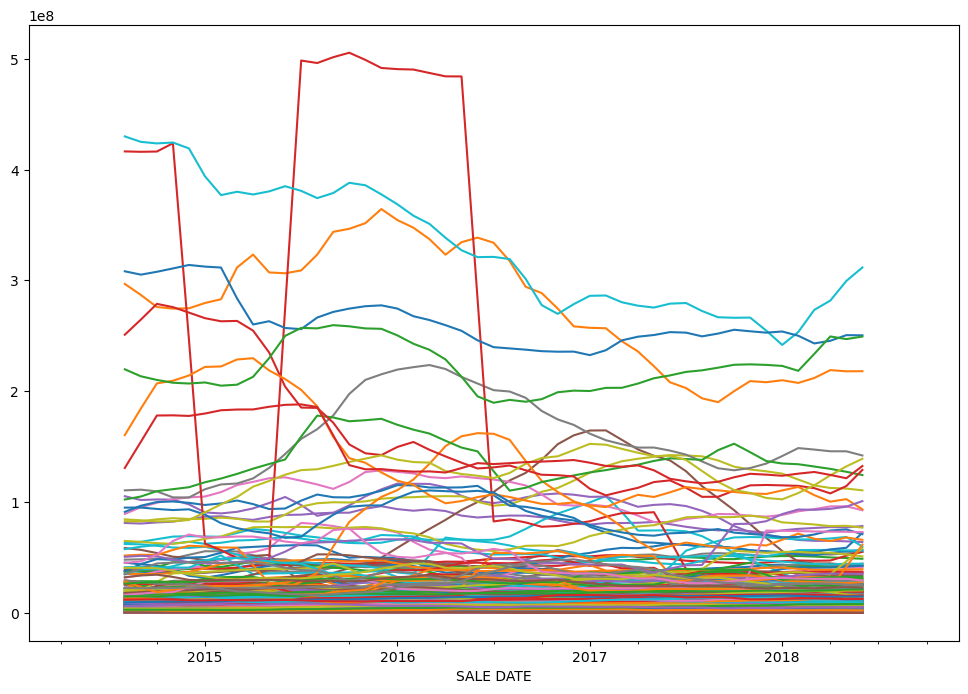

In [176]:
# Let's plot these trends
trend_df.plot(figsize=(12,8))

# Removing the legend
plt.legend().remove()
plt.show()

In [ ]:
trend_df 

In [184]:
''' Now creating a function that takes in the dataframe with has the neighborhood as the columns and the index as the date and returns the 
pairwise euclidean distance between each neighborhood'''

def calc_euclidean_dist(df):
    """
    Takes in a DataFrame and computes all pairwise Euclidean Distance
    """
    # Calculating the pairwise Euclidean distance
    from sklearn.metrics.pairwise import euclidean_distances
    import scipy.spatial.distance as dist
    from scipy.spatial.distance import pdist, squareform

    # Dropping NaN values
    #df.dropna(inplace=True)

    distance = pdist(df, metric='euclidean')

    # Converting the distance to a square matrix
    #distance = squareform(distance)

    # Creating a dataframe from the distance matrix
    df_distance = pd.DataFrame(distance, columns=df.columns, index=df.index)
    return df_distance

# Calculating the pairwise euclidean distance between each neighborhood
df_distance = calc_euclidean_dist(trend_df)
df_distance.head()

ValueError: Shape of passed values is (1081, 1), indices imply (47, 255)